## 1. Провести визуализация данных в трехмерном пространстве (3D Plot). Для выборки «Iris» обосновать выбор трех измерений (сделать дополнительные исследования, например карта корреляций). Сравнить трехмерные диаграммы для выборок и сделать предварительные выводы (Исходное количество кластеров считаем неизвестным).  В отчёт включить обоснование выбора измерений (результаты исследований и вывод по ним) и графики

### Датасет Ирисы Фишера

In [158]:
from sklearn.datasets import load_iris
import numpy  as np
import pandas as pd

iris = load_iris()
data_pd = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
data_pd = data_pd.rename(columns={'sepal length (cm)': 'sl', 'sepal width (cm)': 'sw', 'petal length (cm)': 'pl', 'petal width (cm)': 'pw'})

print(data_pd)
print(data_pd.describe())

      sl   sw   pl   pw  target
0    5.1  3.5  1.4  0.2     0.0
1    4.9  3.0  1.4  0.2     0.0
2    4.7  3.2  1.3  0.2     0.0
3    4.6  3.1  1.5  0.2     0.0
4    5.0  3.6  1.4  0.2     0.0
..   ...  ...  ...  ...     ...
145  6.7  3.0  5.2  2.3     2.0
146  6.3  2.5  5.0  1.9     2.0
147  6.5  3.0  5.2  2.0     2.0
148  6.2  3.4  5.4  2.3     2.0
149  5.9  3.0  5.1  1.8     2.0

[150 rows x 5 columns]
               sl          sw          pl          pw      target
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333    1.000000
std      0.828066    0.435866    1.765298    0.762238    0.819232
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.350000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.00000

Из результатов по исследованиям в предыдущей лабораторной работе, известно, что для параметра sw имеем множество выбросов, поэтому для визуализации используем все параметры за исключением этого параметра и target. 

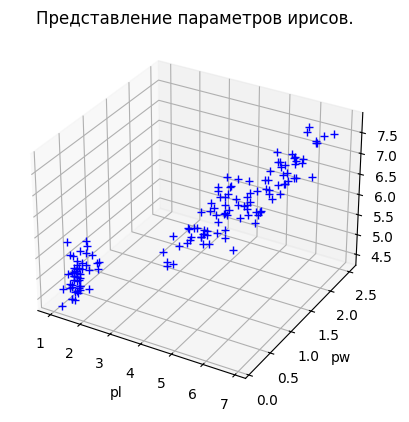

In [159]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
z = data_pd['sl']
x = data_pd['pl']
y = data_pd['pw']
ax.plot3D(x, y, z, 'b+')
ax.set_xlabel('pl')
ax.set_ylabel('pw')
ax.set_zlabel('sl')
ax.set_title('Представление параметров ирисов.')

plt.show()

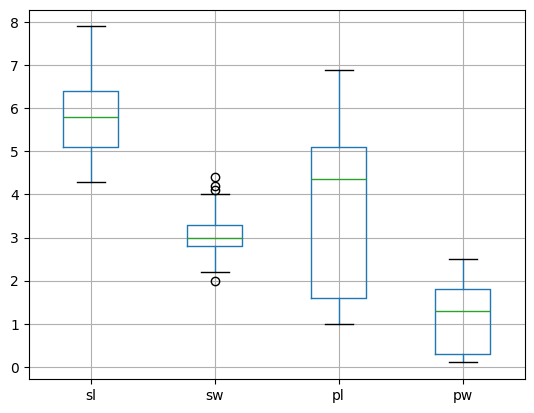

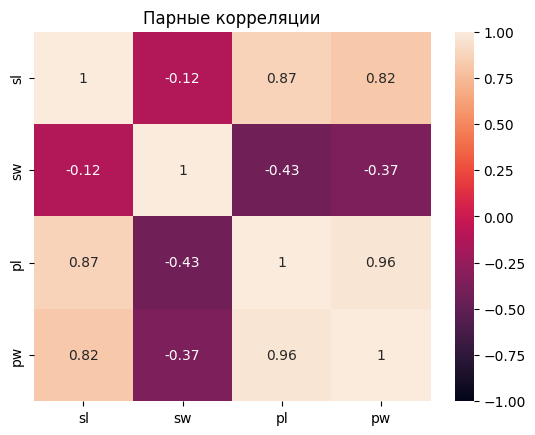

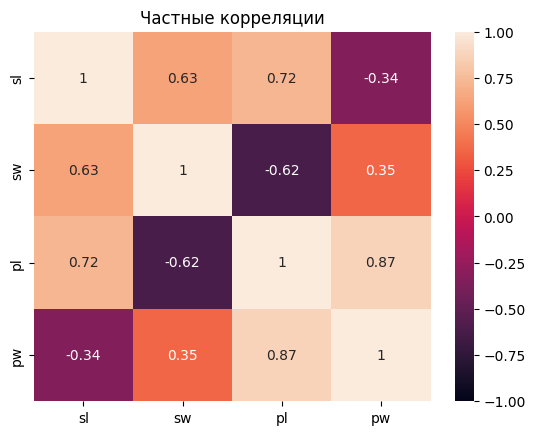

In [160]:
import seaborn as sns
import pingouin

data_x = data_pd.iloc[:,:-1]
corr_matr = data_x.corr()
pcorr_matr = data_x.pcorr()

data_x.boxplot()
plt.show()
sns.heatmap(corr_matr, annot=True, vmin=-1, vmax=1)
plt.title('Парные корреляции')
plt.show()
sns.heatmap(pcorr_matr, annot=True, vmin=-1, vmax=1)
plt.title('Частные корреляции')
plt.show()

### Датасет Бейсбол

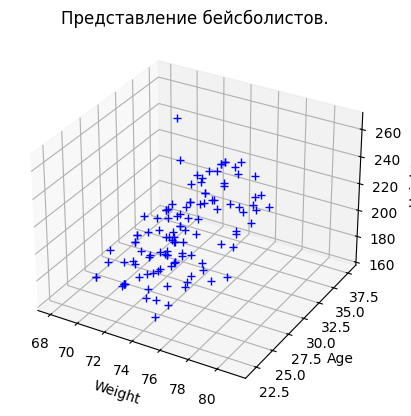

In [179]:
baseball_pd = pd.read_csv('Baseball_formatted.csv', delimiter=';', decimal=',')
ax = plt.axes(projection='3d')
z = baseball_pd['Height']
x = baseball_pd['Weight']
y = baseball_pd['Age']
ax.plot3D(x, y, z, 'b+')
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Height')
ax.set_title('Представление бейсболистов.')
plt.show()

На трёхмерном представлении параметров ирисов ярко выражены два кластера. А про данные, касающиеся бейсболистов, нельзя точно сказать о наличии отдельных кластеров. Тут данные выглядят хаотично и перемешано.

## 2.	Провести иерархическую кластеризацию. Исследовать зависимость результатов иерархической классификации от выбора меры близости (евклидово расстояние, манхэттенское расстояние, расстояние Чебышева, косинусное) и правила объеди-нения кластеров (одиночная связь, полная связь, невзвешенная средняя связь, не-взвешенная центроидная связь, метод Уорда). Проанализировать диаграмму изме-нения расстояний при объединении кластеров. Оценить предположительное число кластеров, на которое разделяется исследуемая совокупность. В отчёт включить наилучшие результаты и обосновать почему они наилучшие (сравнить с пло-хим/средним результатом). Так же включить обоснование предположительного числа кластеров.

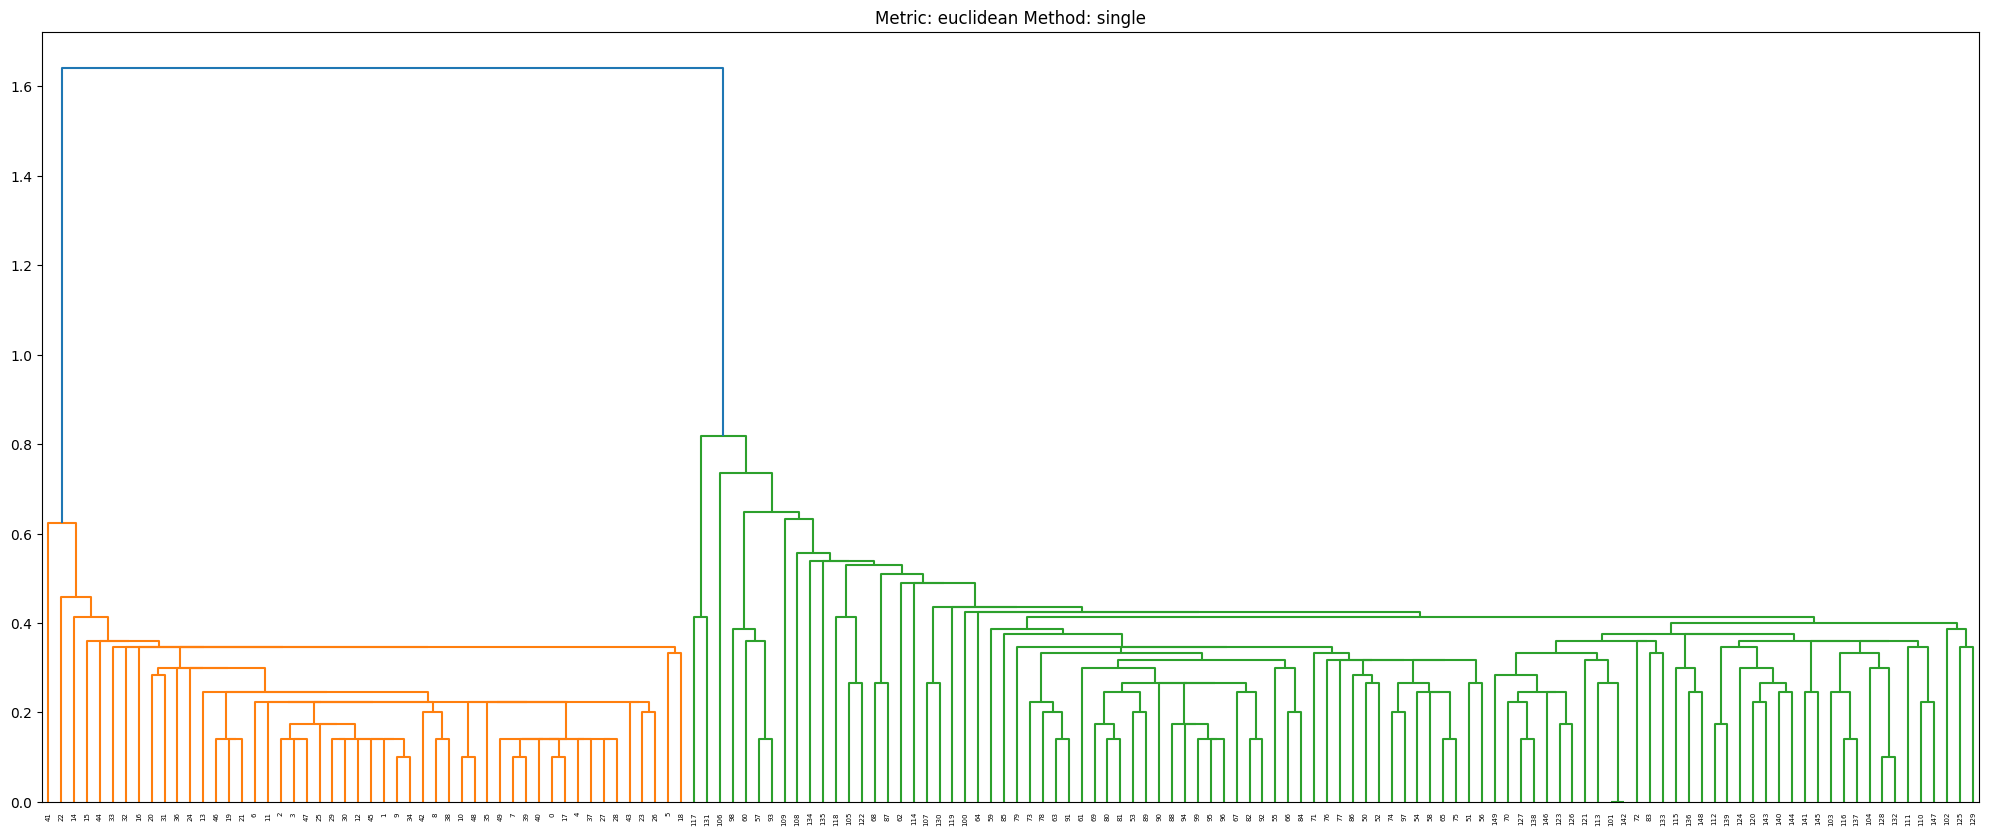

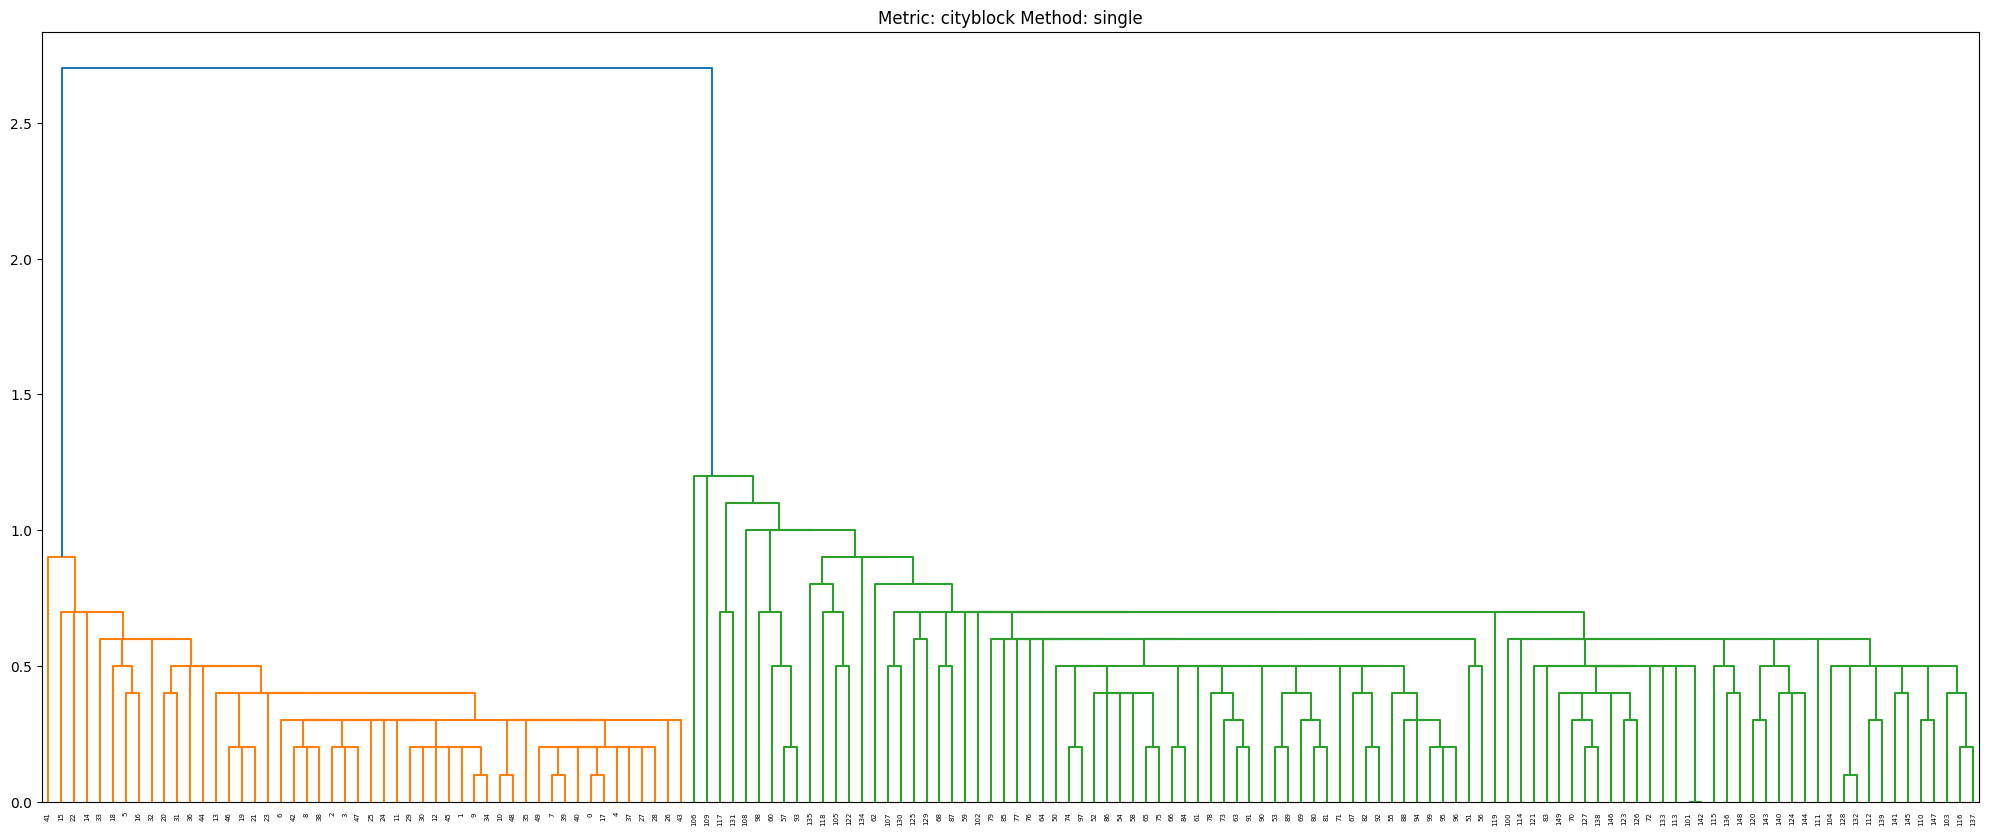

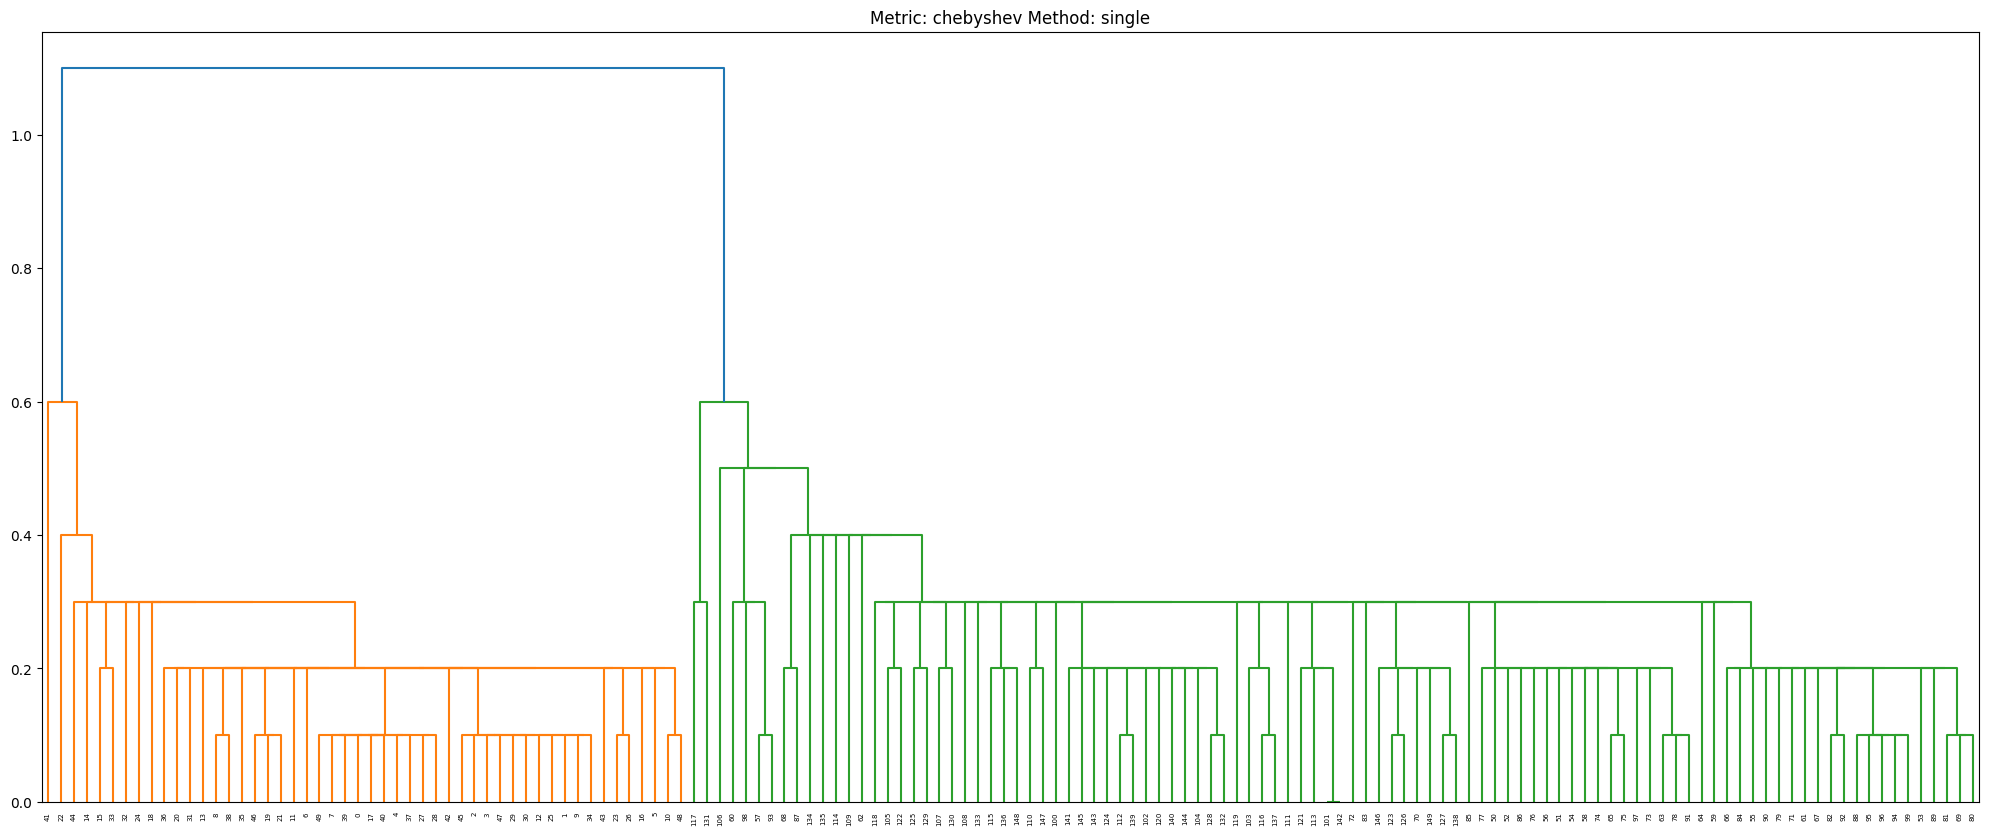

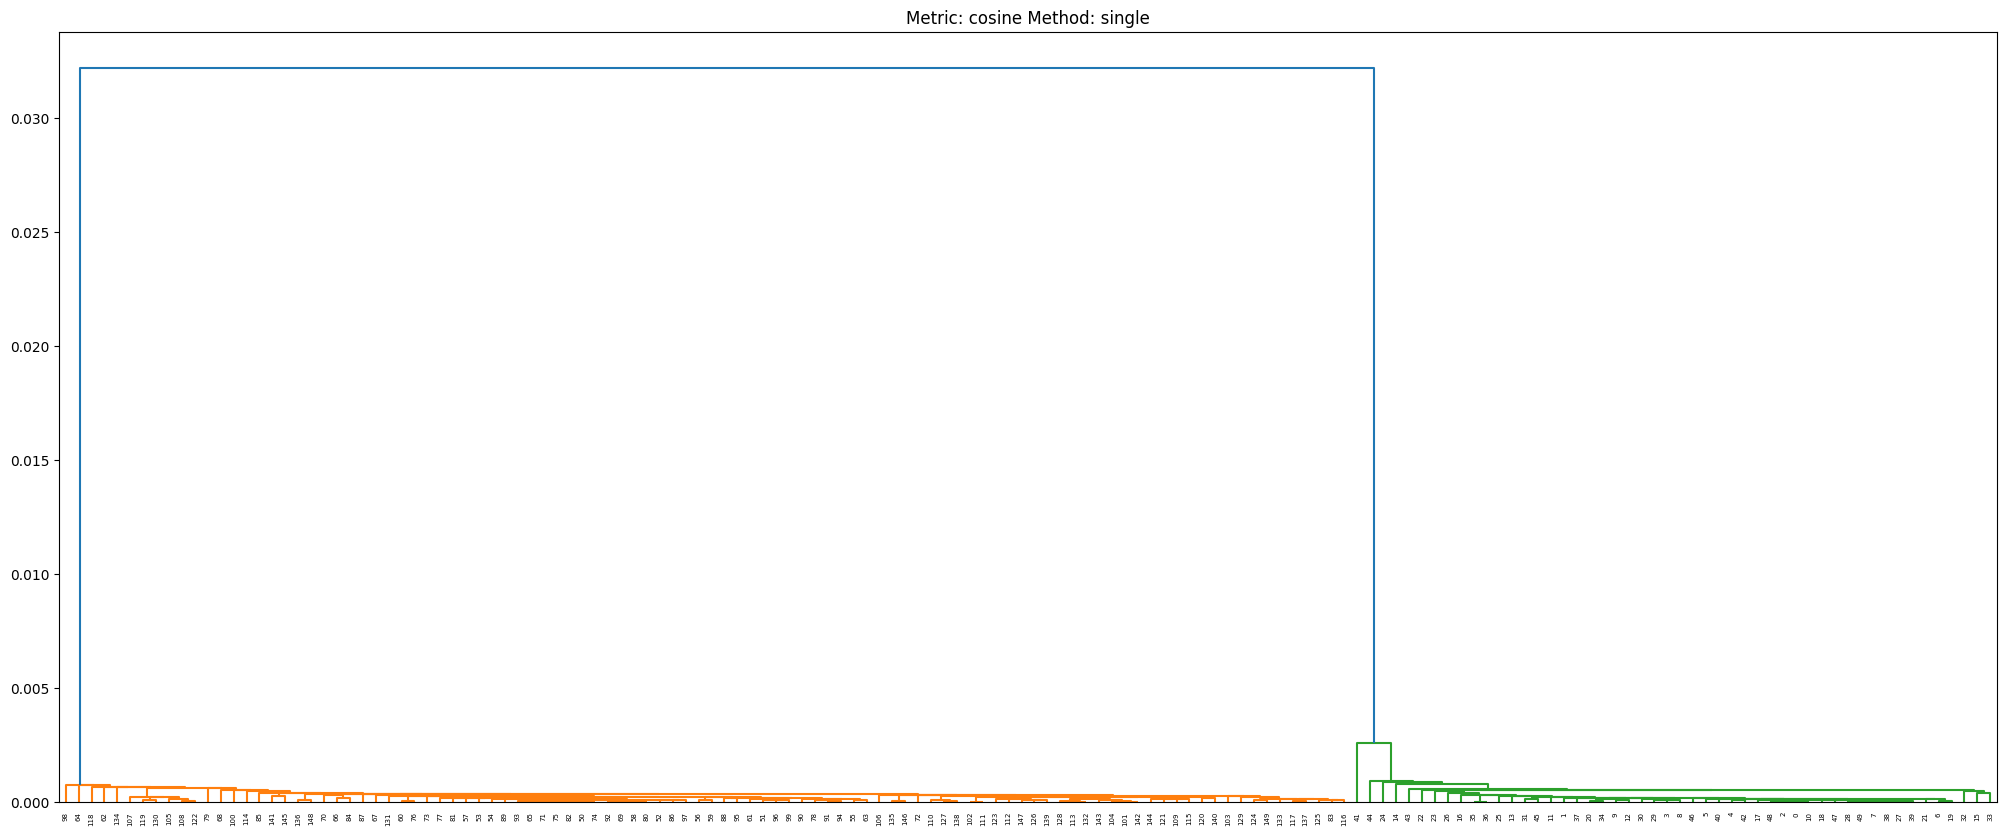

In [162]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogramm(data_x, method, metric='euclidean'):
    cluster_ar = linkage(data_x, method=method, metric=metric)
    link_df = pd.DataFrame(cluster_ar, index=[f'step {i+1}' for i in range(cluster_ar.shape[0])], columns=['cluster1', 'cluster2', 'dist', 'number elements'] )
    fig = plt.figure(figsize=(25,10))
    row_dendr = dendrogram(link_df)
    plt.title(f'Metric: {metric} Method: {method}')
    plt.show()

metrics = ['euclidean', 'cityblock', 'chebyshev', 'cosine']

for metric in metrics:
    plot_dendrogramm(data_x, 'single', metric)


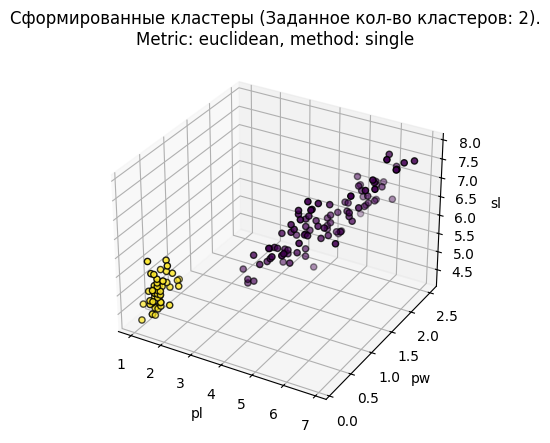

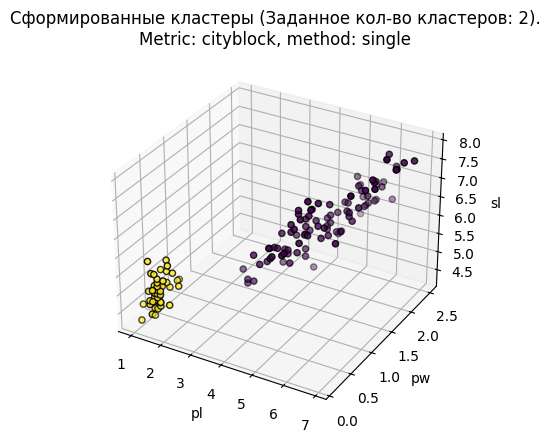

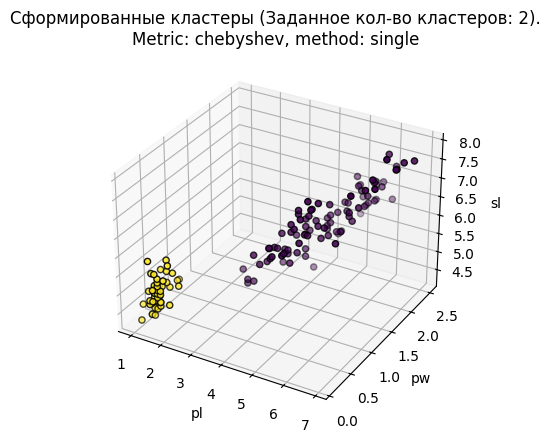

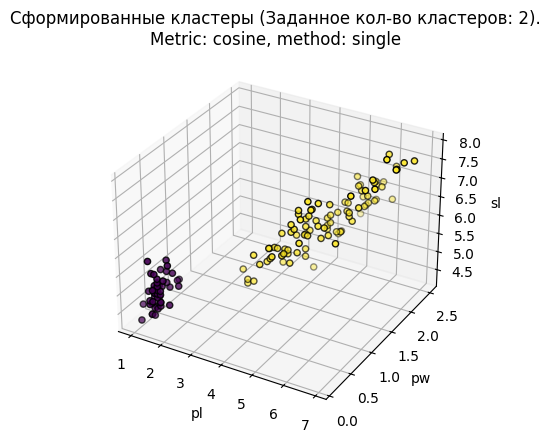

In [163]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

def plot_clusters(data_x, n_clusters, method, metric='euclidean', columns=('sl', 'pl', 'pw')):
    '''Провести кластеризацию по заданному методу объединения и метрике. Для правила центроидов (К средних) используется только евклидова метрика'''
    if method != 'centroid':
        cl = AgglomerativeClustering(n_clusters=n_clusters, linkage=method, metric=metric)
        labels = cl.fit_predict(data_x)
    elif method == 'centroid':
        kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto').fit(data_x)
        labels = kmeans.labels_
    else:
        return

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    z = data_x[columns[0]]
    x = data_x[columns[1]]
    y = data_x[columns[2]]
    ax.scatter(x, y, z, c=labels, marker='o', edgecolors=['000']*len(labels))
    ax.set_xlabel(columns[1])
    ax.set_ylabel(columns[2])
    ax.set_zlabel(columns[0])
    ax.set_title(f'Сформированные кластеры (Заданное кол-во кластеров: {n_clusters}).\nMetric: {metric}, method: {method}')
    plt.show()

for metric in metrics:
    plot_clusters(data_x, 2, 'single', metric)

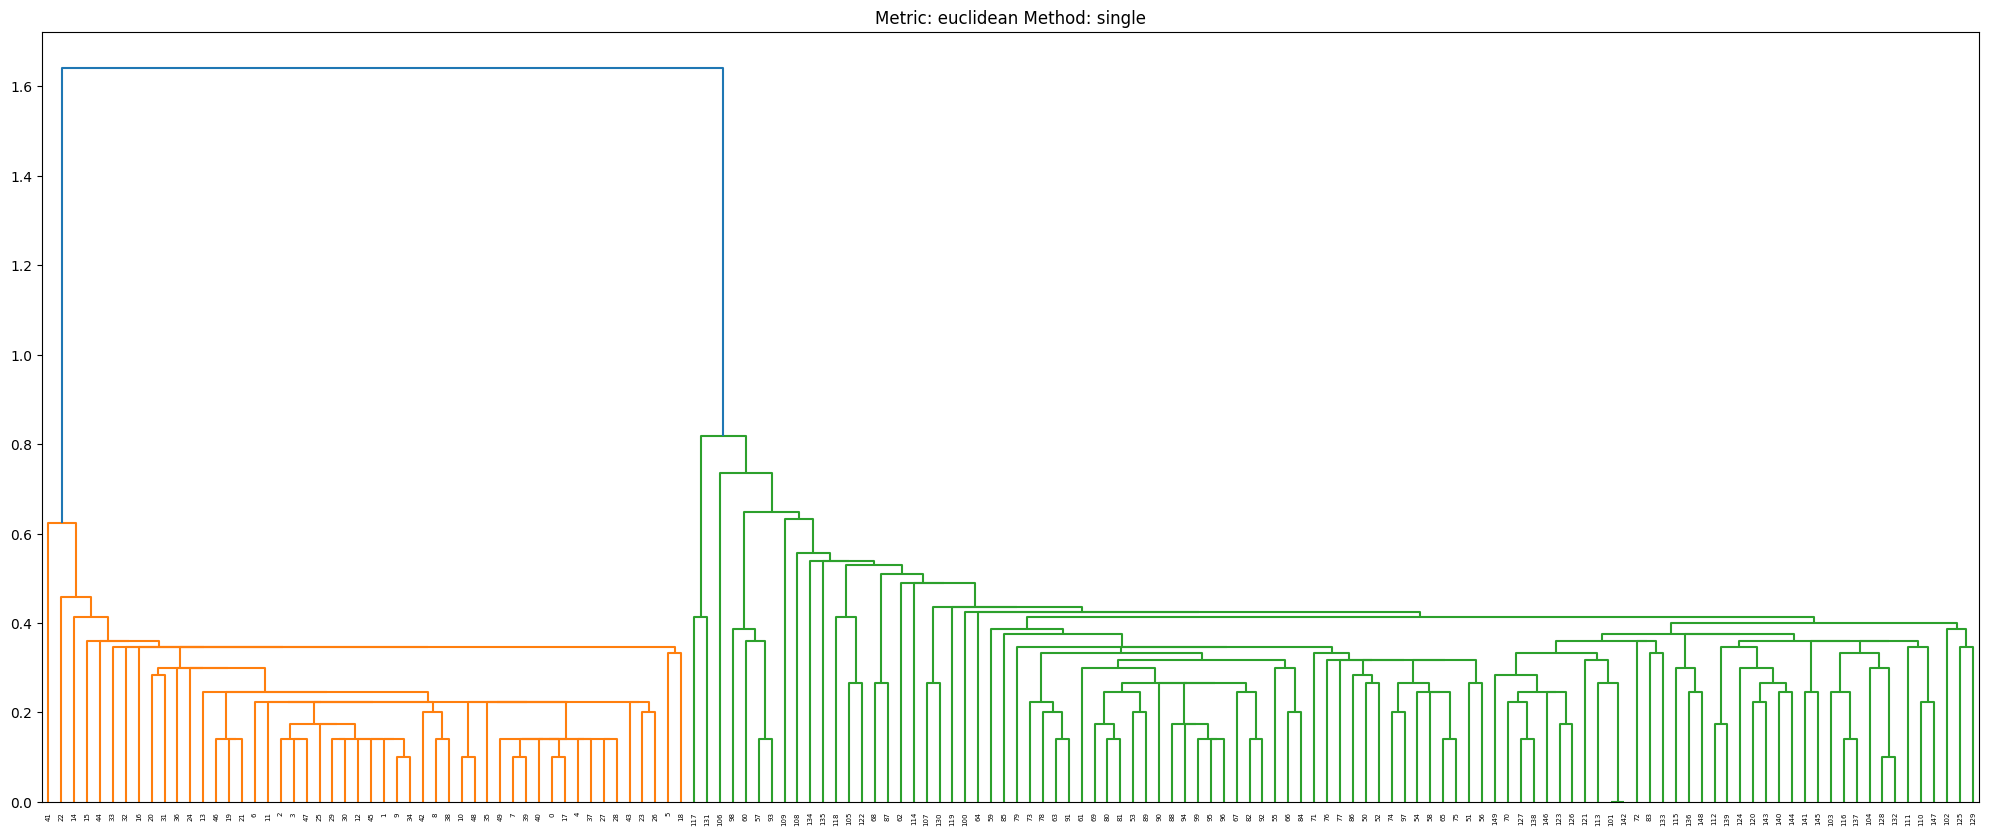

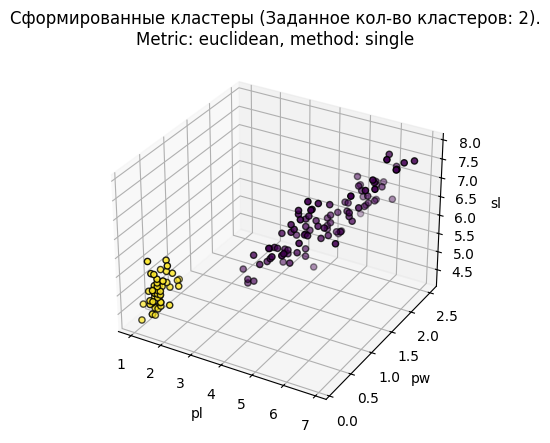

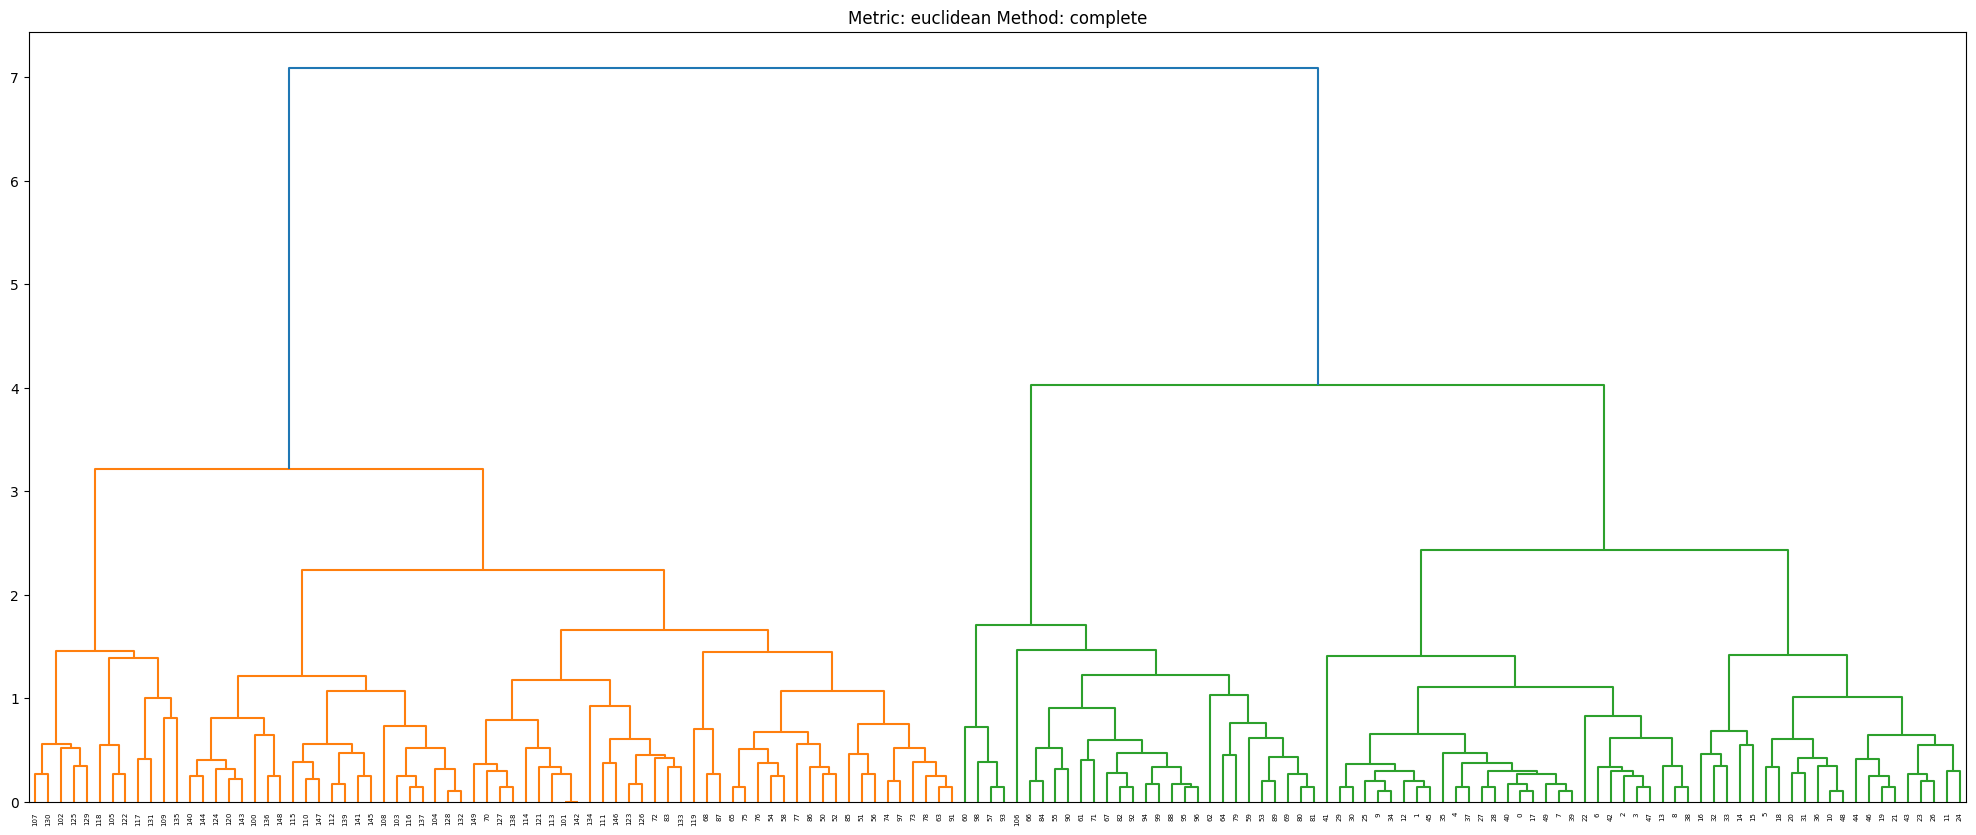

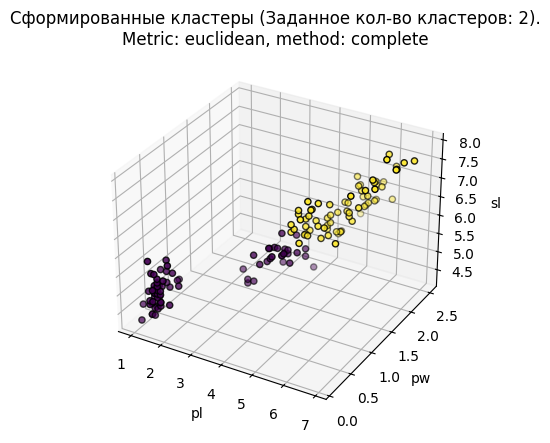

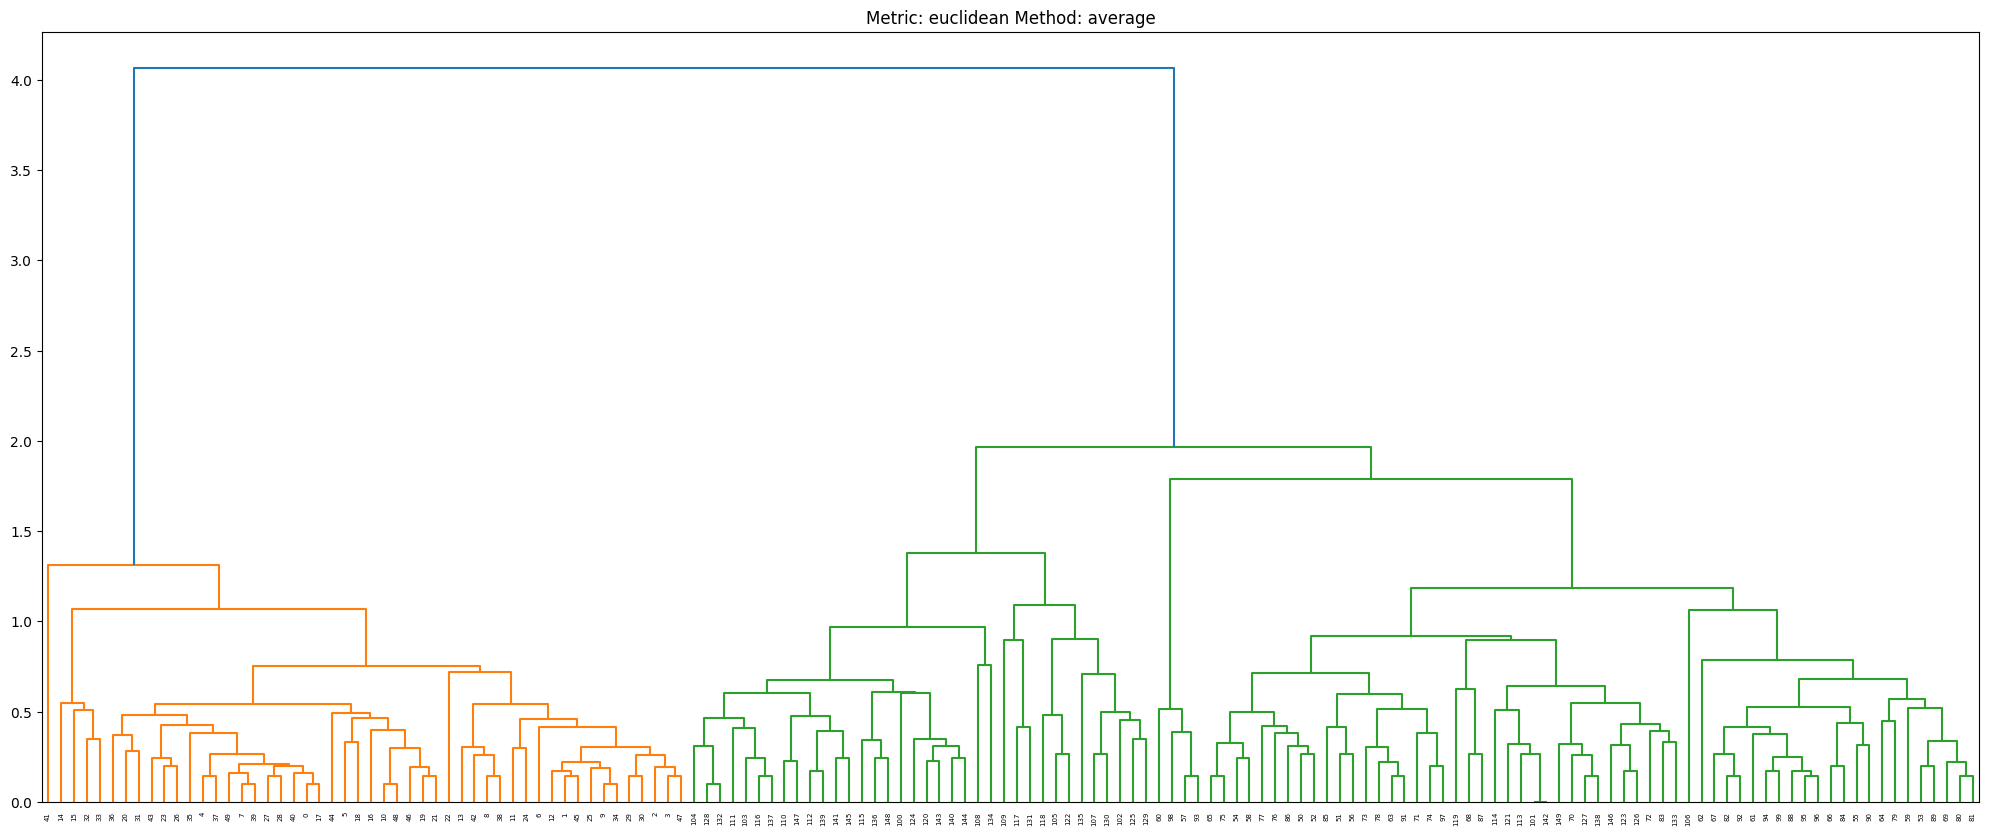

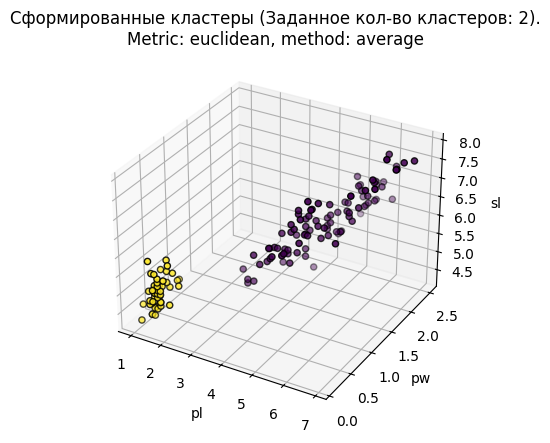

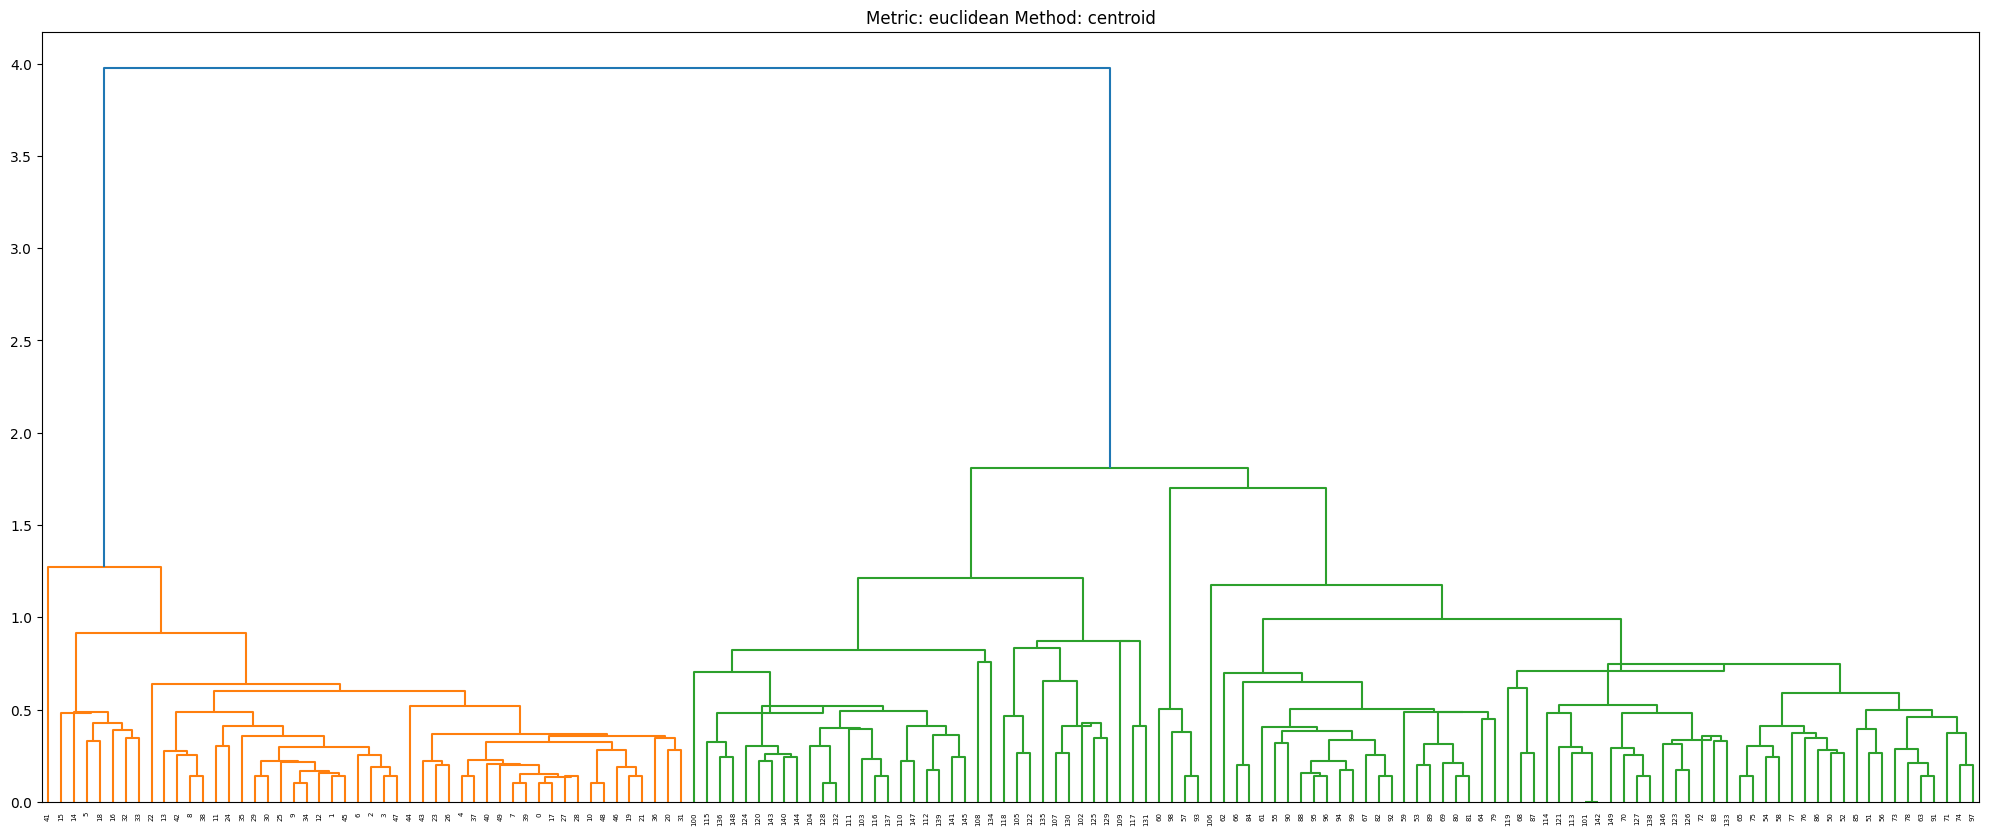

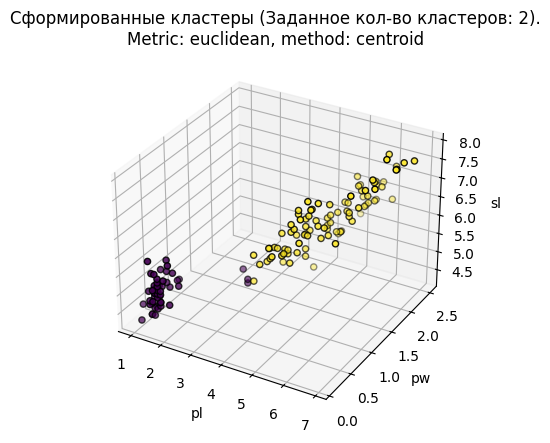

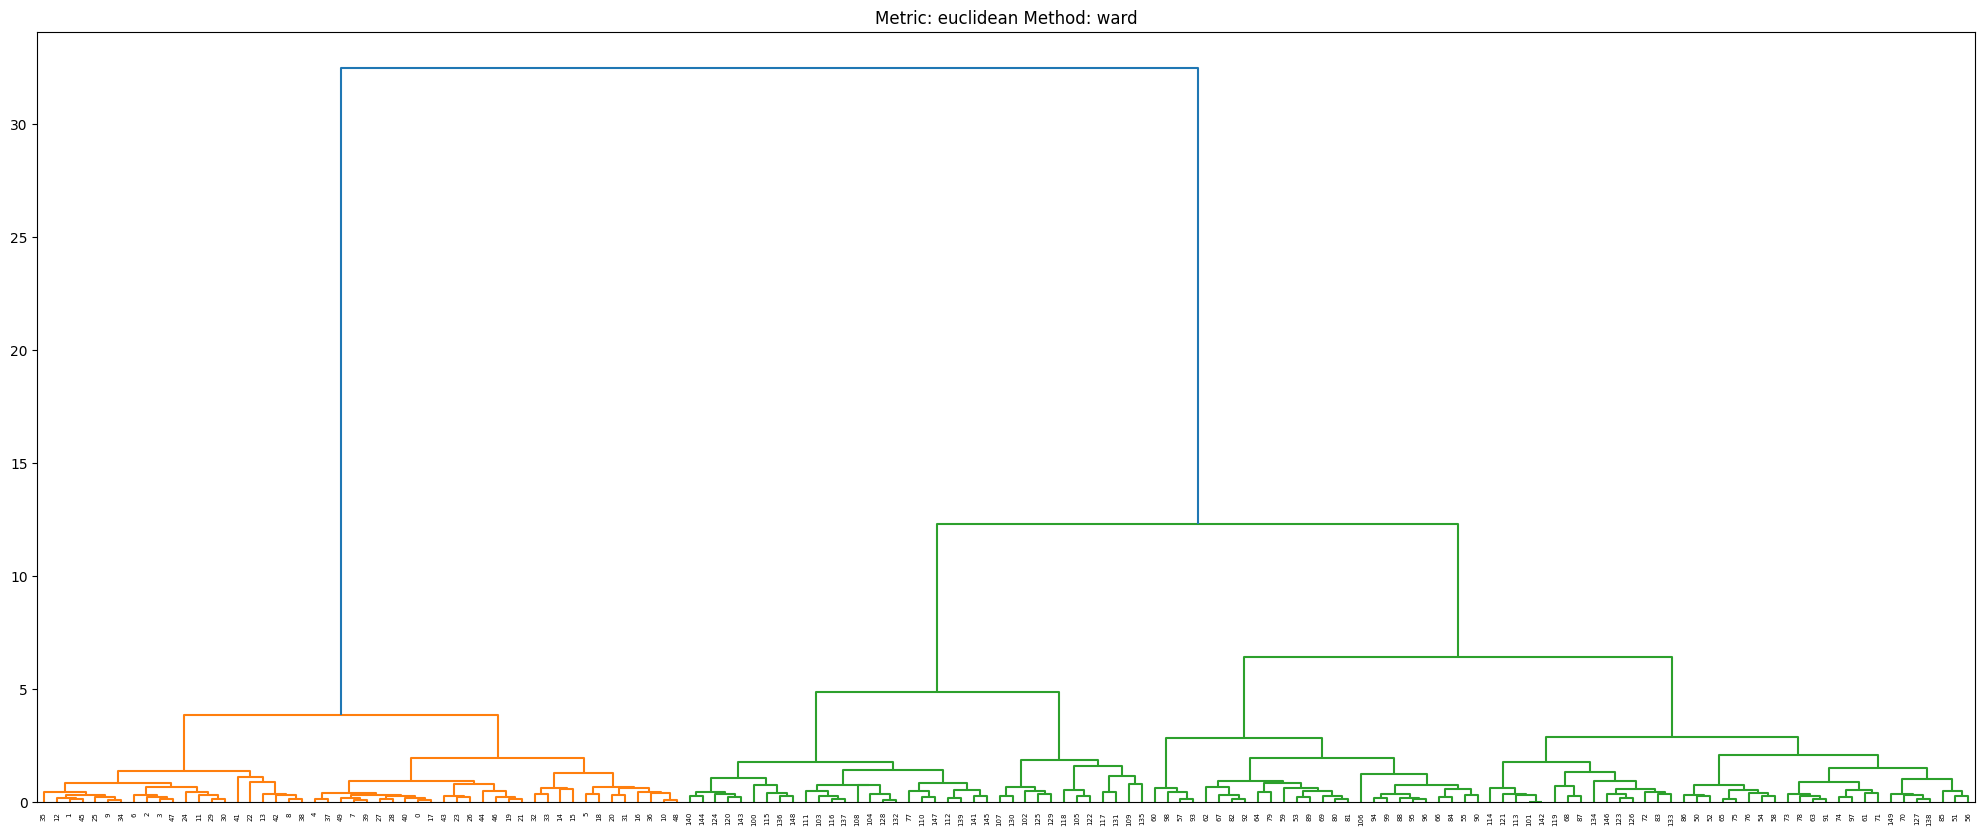

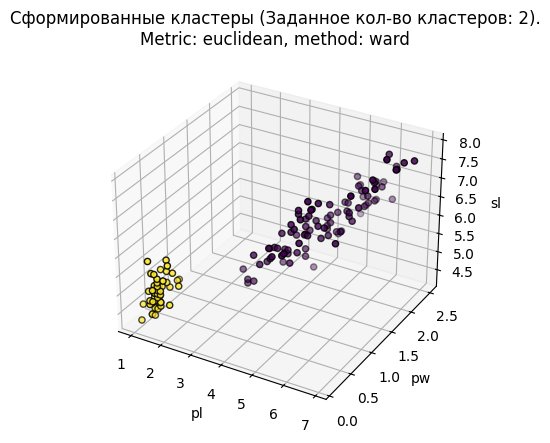

In [164]:
methods = ['single', 'complete', 'average', 'centroid', 'ward']

for method in methods:
    plot_dendrogramm(data_x, method, 'euclidean')
    plot_clusters(data_x, 2, method, 'euclidean')

По трёхмерному представлению всех наблюдений выборки и по всем полученным дендрограммам видно, что данные можно поделить на два явно выделенных кластера. Для дендрограмм все объединения до 2 оставшихся кластеров происходили при небольших значениях расстояний, кроме последнего объединения в 1 кластер.

При изменении используемых метрик мы получили одинаковые результаты. Различие было в том, что для разных метрик получались различные значения при объединении кластеров. Для косинусной меры близости расстояние между дальними кластерами было гораздо сильнее выделено, в то время как расстояния между остальными кластерами было значительно менее выделено.

При изменении метод объединения кластеров некоторые результаты получились отличными от большинства. Метод дальнего соседа показал самый худший результат, объединив в один из кластеров множество наблюдений явно не относящихся к нему. Неплохой результат показал метод центроидной связи, выделив лишь пару наблюдений явно не принадлежащих к своему кластеру. Остальные методы показали себя одинаково хорошо😎👍, показав ожидаемый по трёхмерным графикам результат.

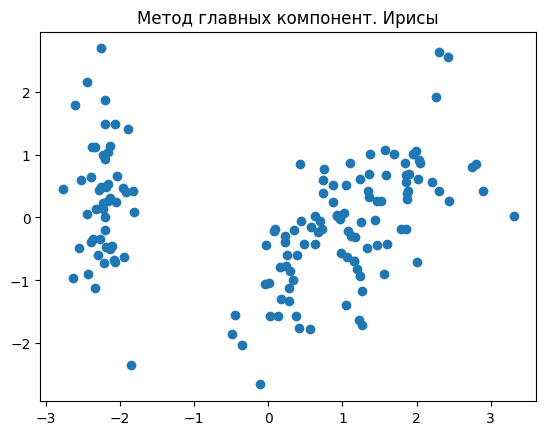

Номера компонент
         0          1          2          3 
Информативность компонент
     0.730      0.229      0.037      0.005 
Собственные вектора
     0.521      0.377     -0.720     -0.261 
    -0.269      0.923      0.244      0.124 
     0.580      0.024      0.142      0.801 
     0.565      0.067      0.634     -0.524 
Собственные числа
     2.918      0.914      0.147      0.021 
--------------------------------------------
Общее количество информации: 95.81%


In [165]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

def get_eigen_values(X, ei_vectors):
    '''Получение списка собственных значений по цинтрированным и нормированным данным и собственным векторам из метода ГК'''
    n_samples = X.shape[0]
    cov_matr = np.dot(X.T, X) / n_samples
    ei_vals = []
    for eigenvector in ei_vectors:
        ei_vals.append(np.dot(eigenvector.T, np.dot(cov_matr, eigenvector)))
    
    return ei_vals

def print_list_rounded(list, width, round_to):
    '''Форматированный вывод данных из списка с округлением до round_to знаков и с выделяемой шириной width на элемент'''
    for elem in list:
        print(f'{elem: >{width}.{round_to}f}', end=' ')
    print()

#Метод ГК. Получение параметров
scaler = StandardScaler()
data_x_scaled = scaler.fit_transform(data_x)
pca = decomposition.PCA()
x_pca = pca.fit_transform(data_x_scaled)
eigen_vectors = pca.components_
eigen_values = get_eigen_values(data_x_scaled, eigen_vectors)
data_delta = pca.explained_variance_ratio_

#Графики
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.title('Метод главных компонент. Ирисы')
plt.show()

#Параметры печати
round_to = 3
width = 10
#Вывод данных
print('Номера компонент')
print_list_rounded(range(data_delta.shape[0]), width, 0)
print('Информативность компонент')
print_list_rounded(data_delta, width, round_to)
print('Собственные вектора')
for ei_vector in eigen_vectors.T:
    print_list_rounded(ei_vector, width, round_to)
print('Собственные числа')
print_list_rounded(eigen_values, width, round_to)
print('-'*44)
print(f'Общее количество информации: {100*sum(data_delta[:2]):.2f}%')

По построенной проекции можно сказать, что явно видно два кластера. Всего метод главных компонент в общем случае выделяет столько компонент, сколько имеется параметров в системе. Однако, в данном случае две из четырёх компонент малоинформативны, поэтому ими можно пренебречь и рассматривать только первые две. Они содержат 96% информации.

          dim1      dim2
0   -26.283514 -0.934040
1   -22.458551 -1.582246
2   -23.502516 -0.568364
3   -22.724354 -0.502646
4   -26.786913 -0.364475
..         ...       ...
145  12.384520  0.200850
146   6.782580 -2.073794
147  11.200541  0.227081
148  13.349828 -1.299510
149   8.691272  0.213793

[150 rows x 2 columns]


<Axes: xlabel='dim1', ylabel='dim2'>

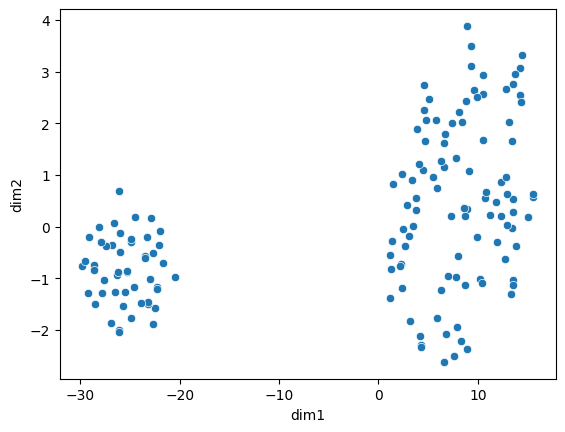

In [166]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data_x_scaled)
tsne_df = pd.DataFrame(data=tsne_data, columns=('dim1', 'dim2'))
print(tsne_df)
sns.scatterplot(data=tsne_df, x='dim1', y='dim2')

Как и ранее видим два кластера. Можно отметить, что данный метод дальше разместил два выделенных кластера и они, как буд-то бы выглядят менее хаотично.

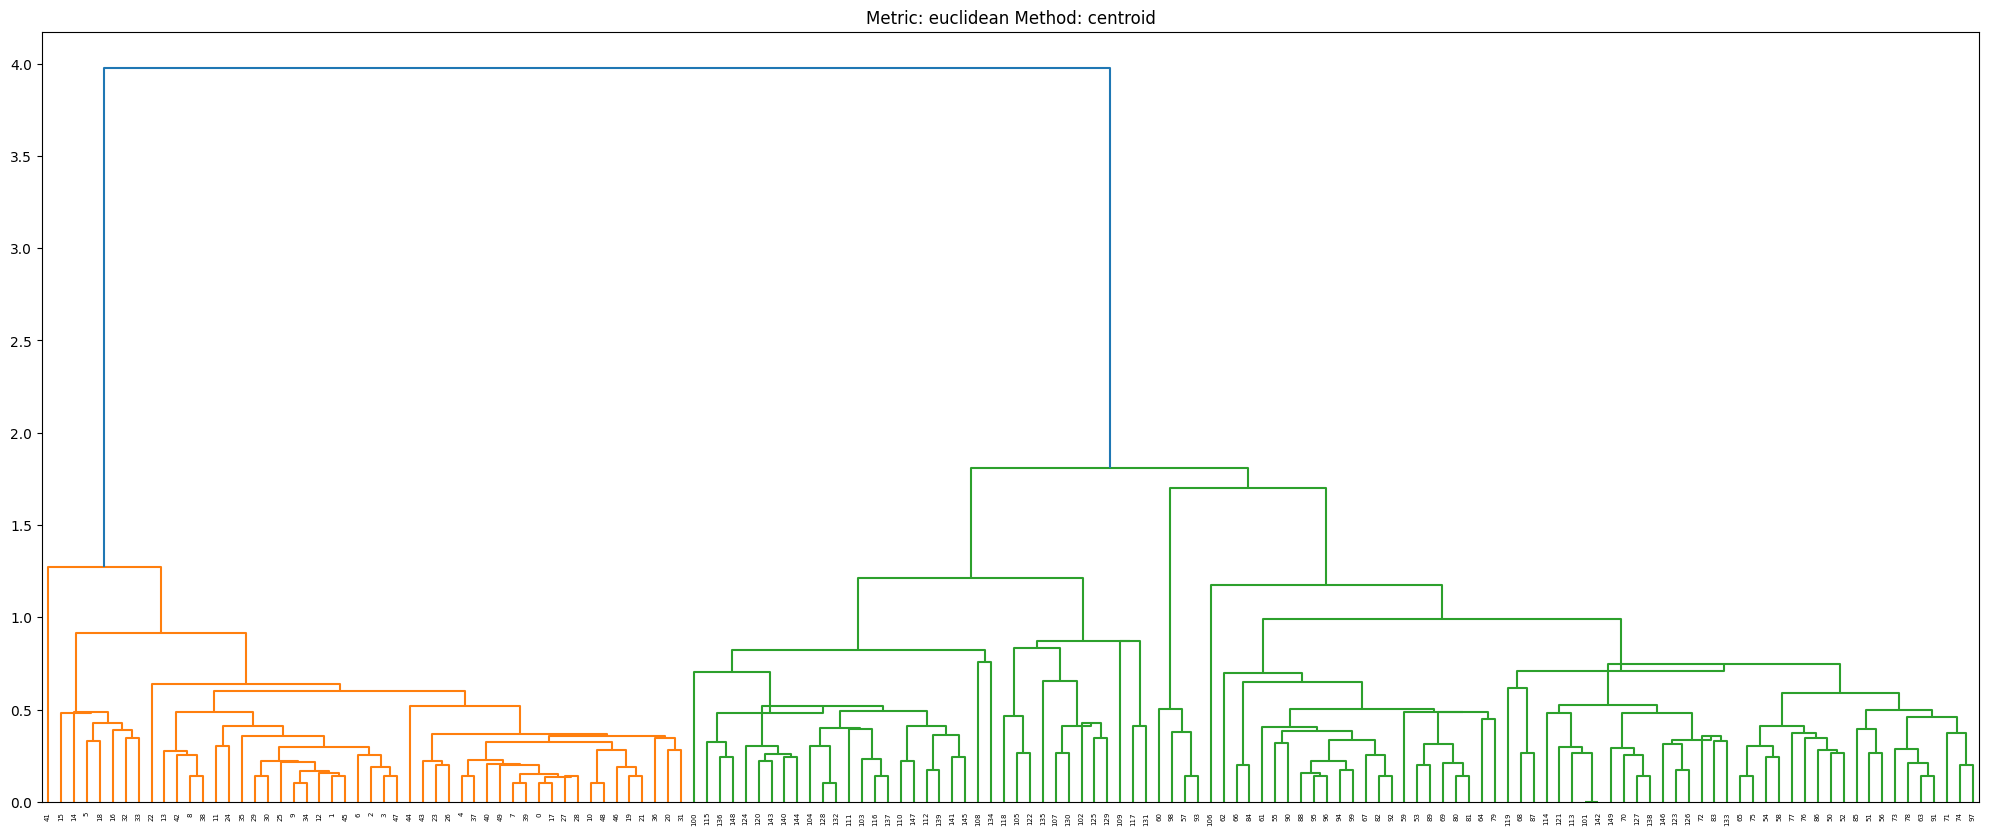

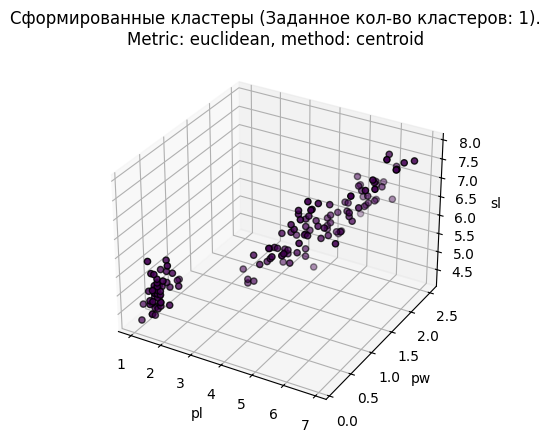

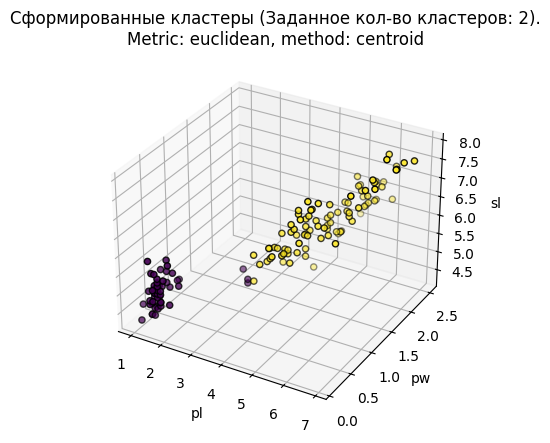

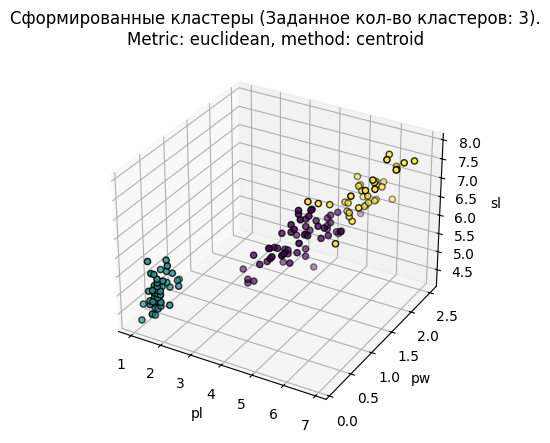

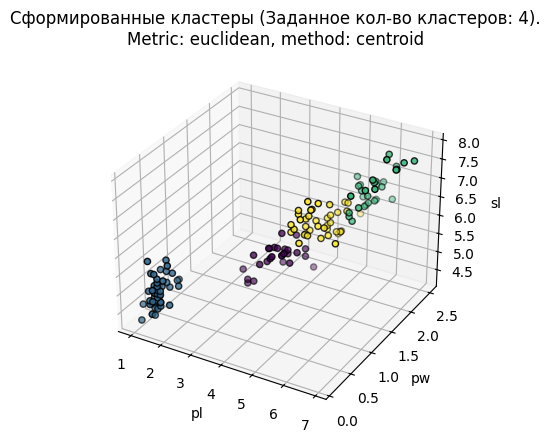

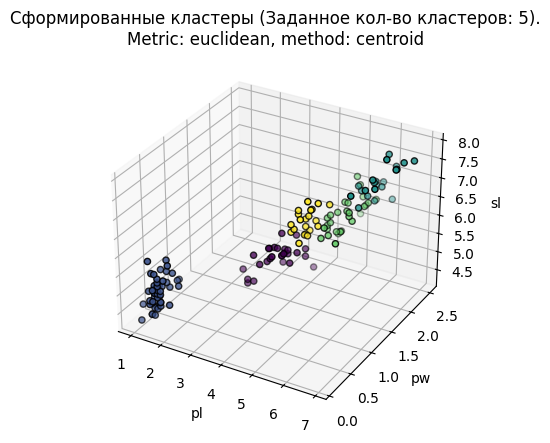

In [167]:
plot_dendrogramm(data_x, method='centroid')
for clusters in range(1, 6):
    plot_clusters(data_x, clusters, method='centroid')

При задании количества кластеров больше 2 мы получаем два кластера, которые буквально "наезжают" друг на друга. Мы не можем точно говорить о том, что это разные кластеры. Если задать 1 кластер, то в него попадают два набора явно относящихся к разным кластерам.

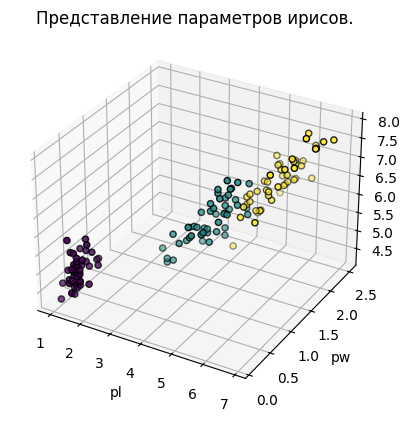

In [168]:
fig = plt.figure()
ax = plt.axes(projection='3d')
z = data_pd['sl']
x = data_pd['pl']
y = data_pd['pw']
ax.scatter(x, y, z, marker='o', c=data_pd['target'], edgecolors=['000']*len(x))
ax.set_xlabel('pl')
ax.set_ylabel('pw')
ax.set_zlabel('sl')
ax.set_title('Представление параметров ирисов.')

plt.show()

## Датасет Бейсбол

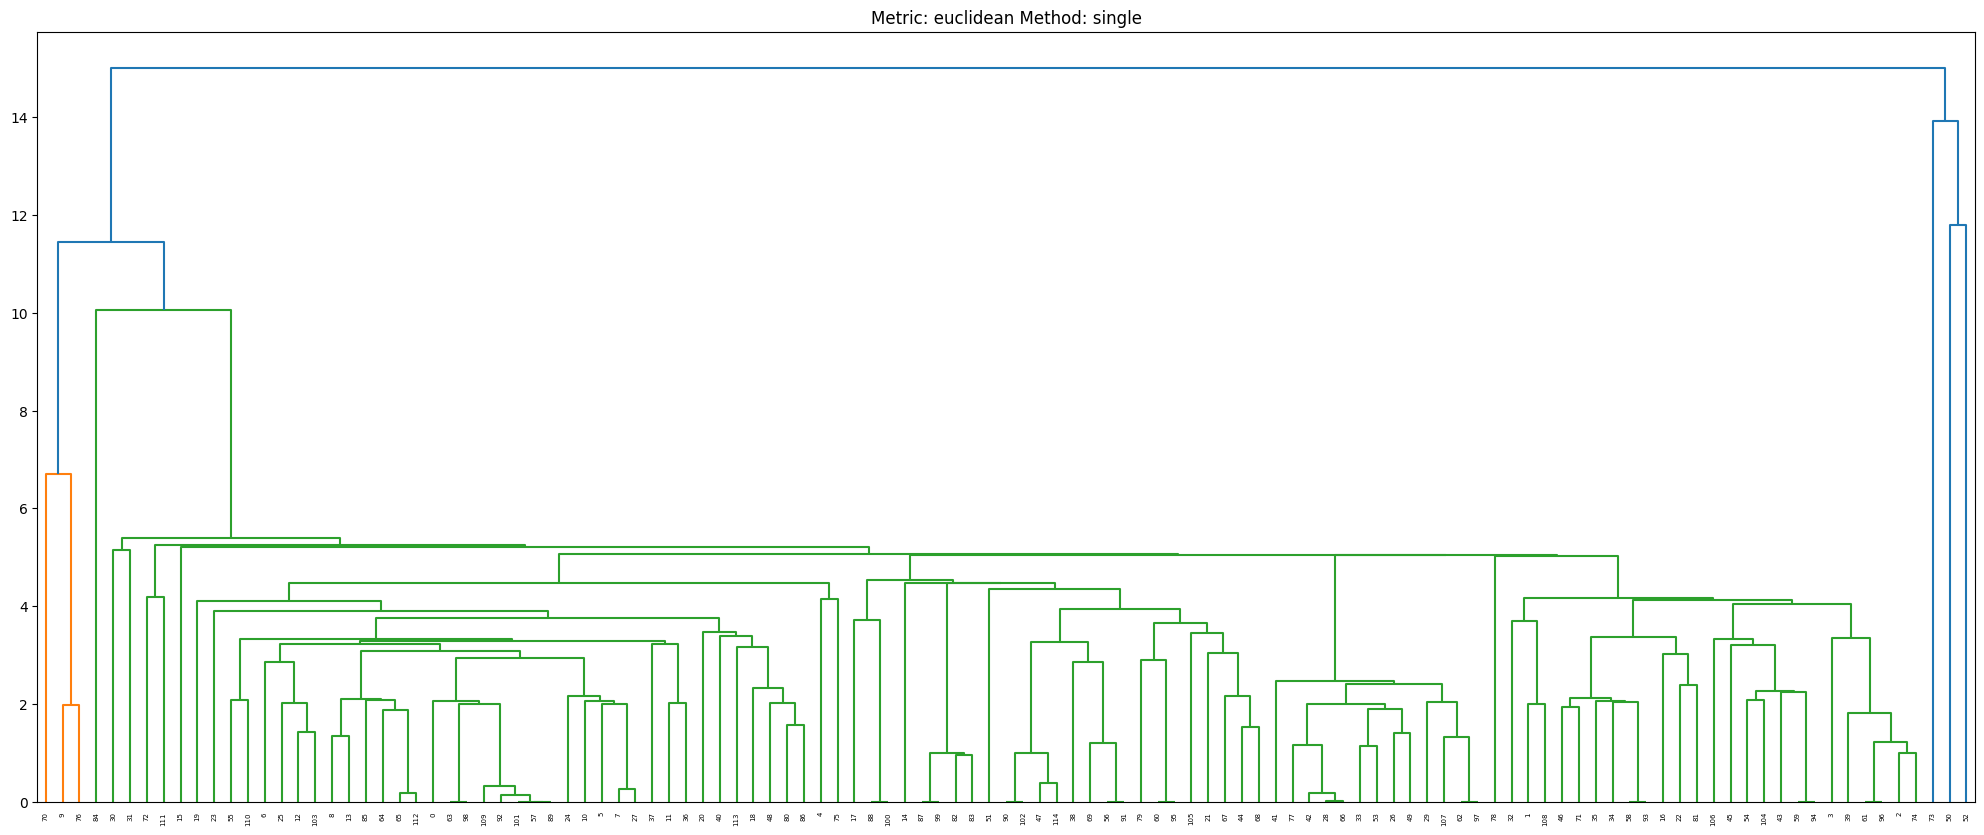

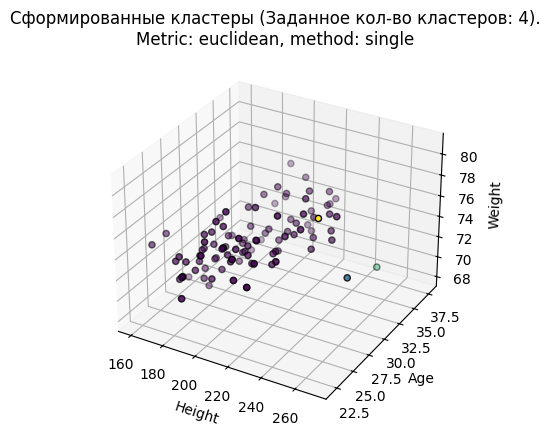

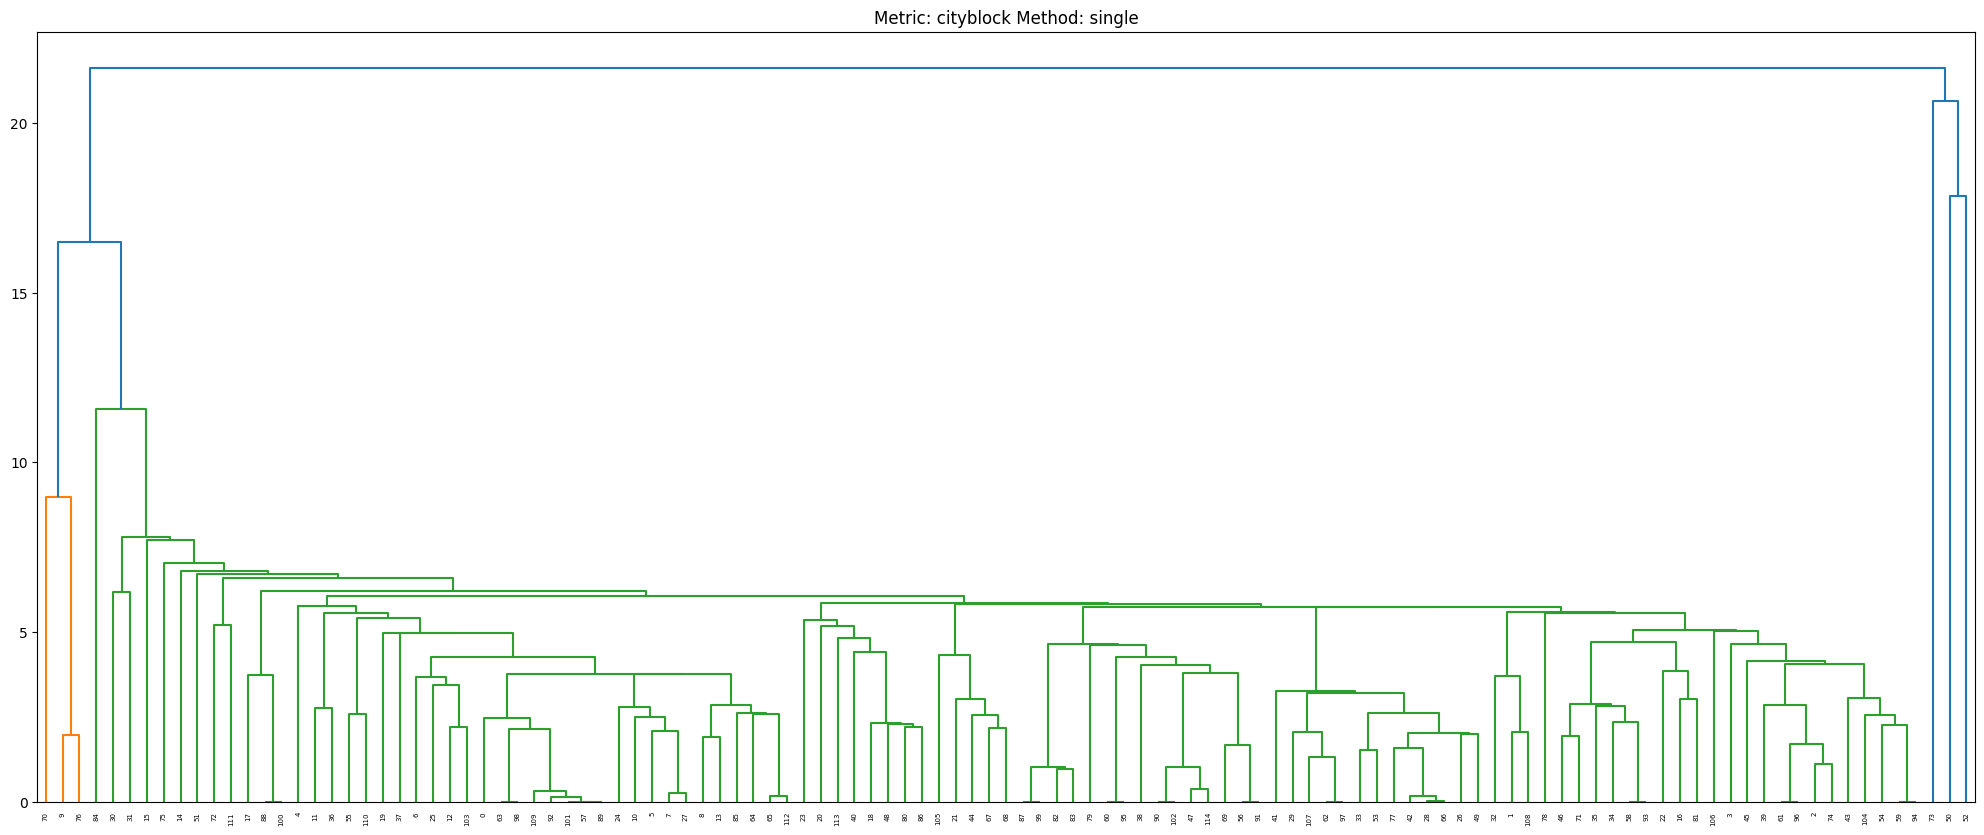

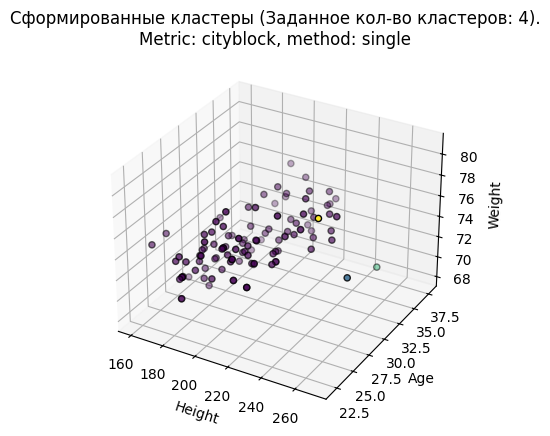

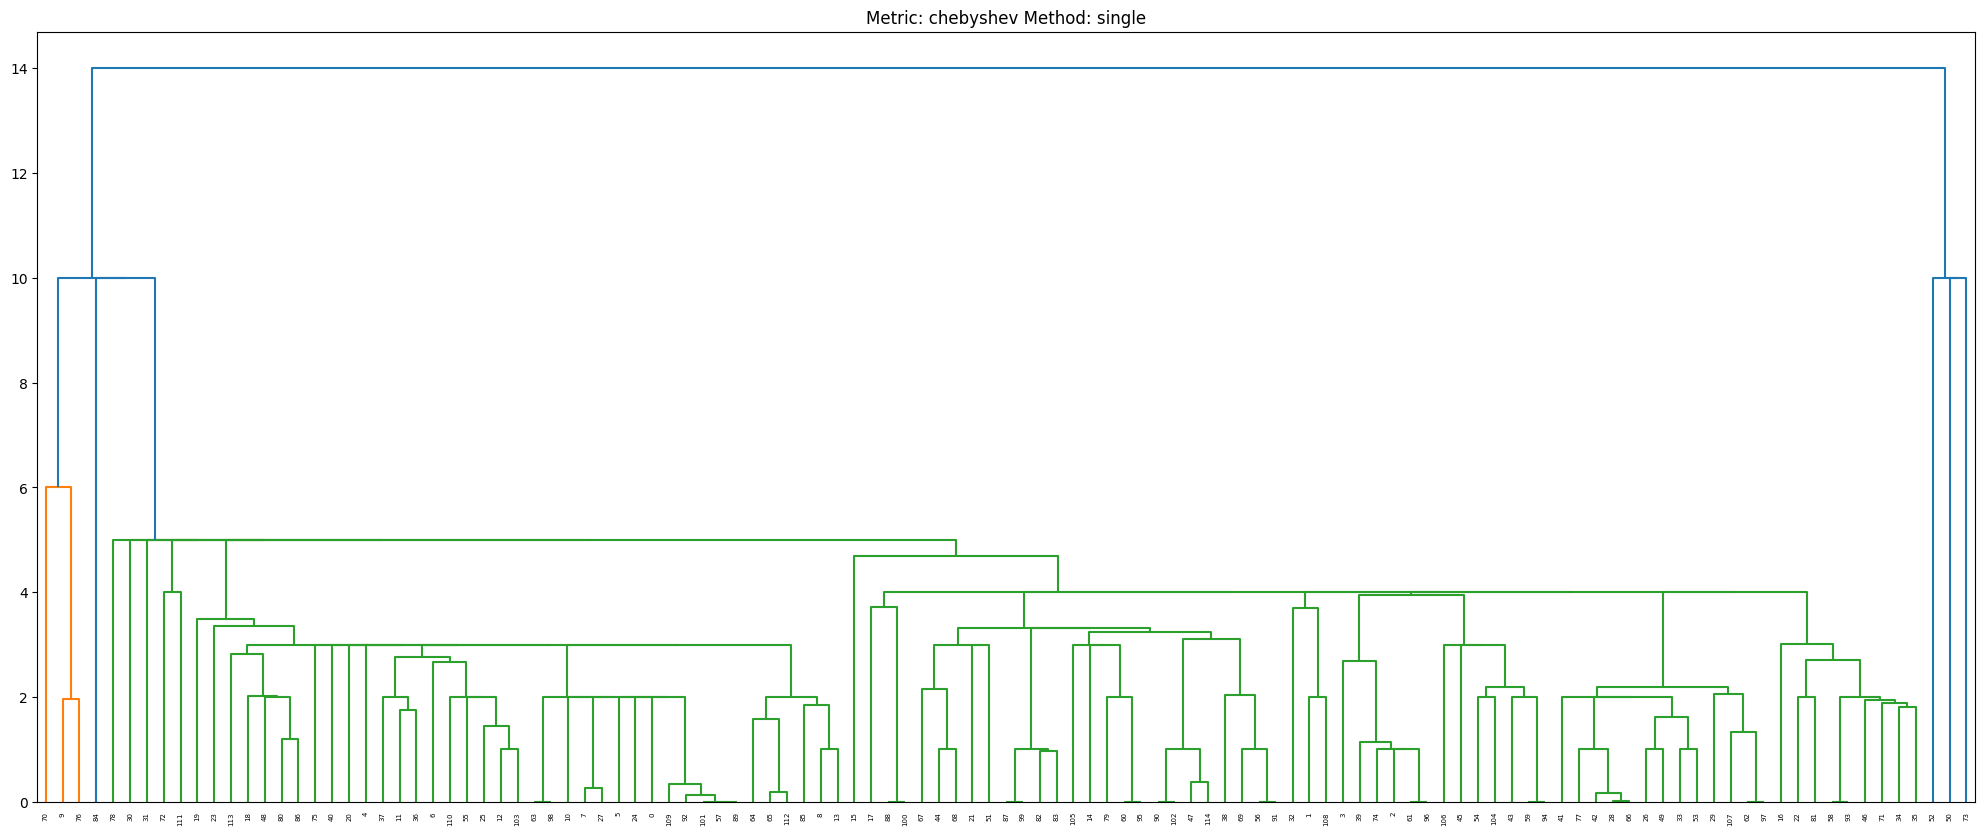

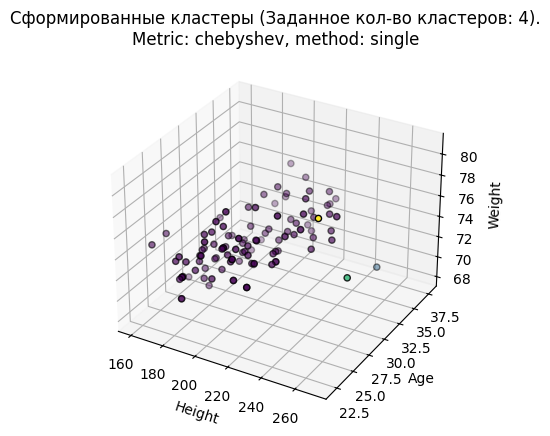

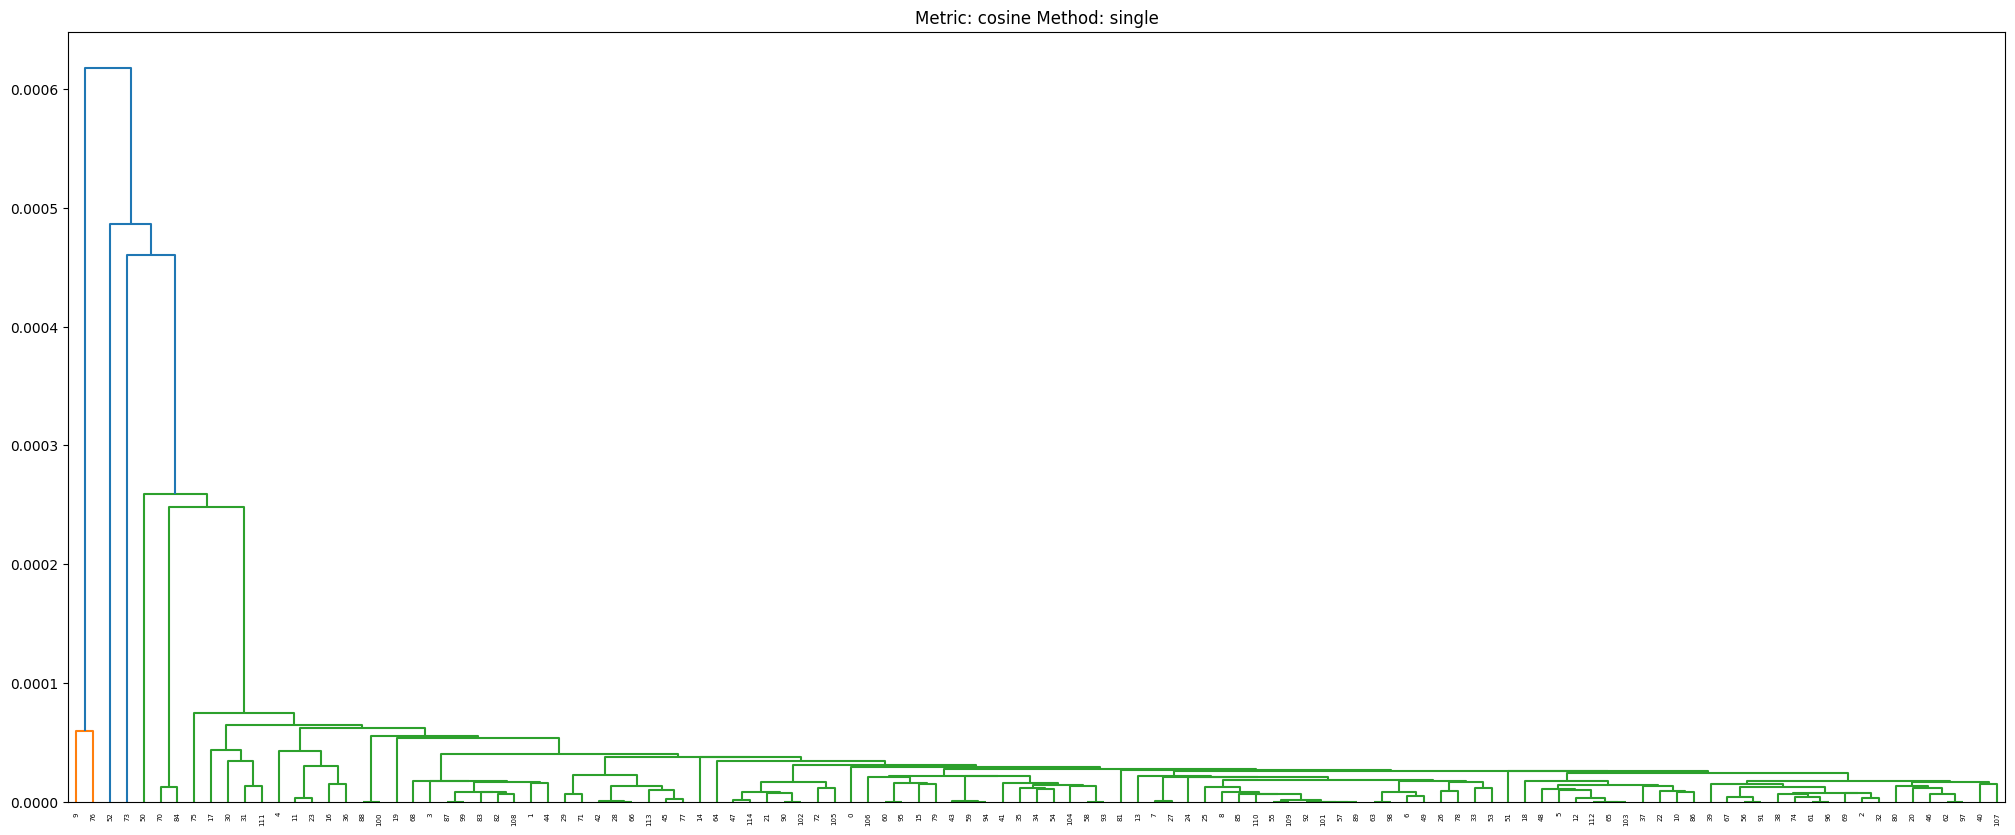

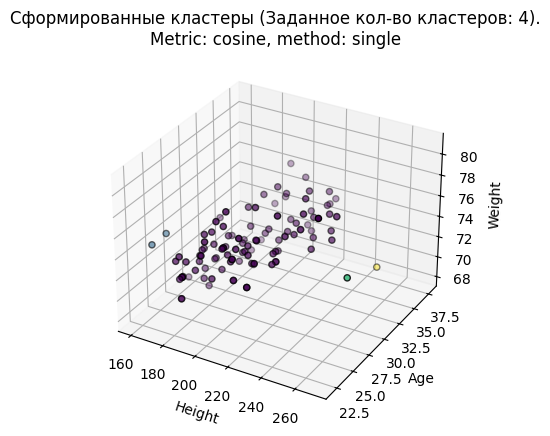

In [169]:
data_x = baseball_pd.iloc[:,1:]

metrics = ['euclidean', 'cityblock', 'chebyshev', 'cosine']
for metric in metrics:
    plot_dendrogramm(data_x, 'single', metric)
    plot_clusters(data_x, 4, 'single', metric, tuple(data_x.columns))

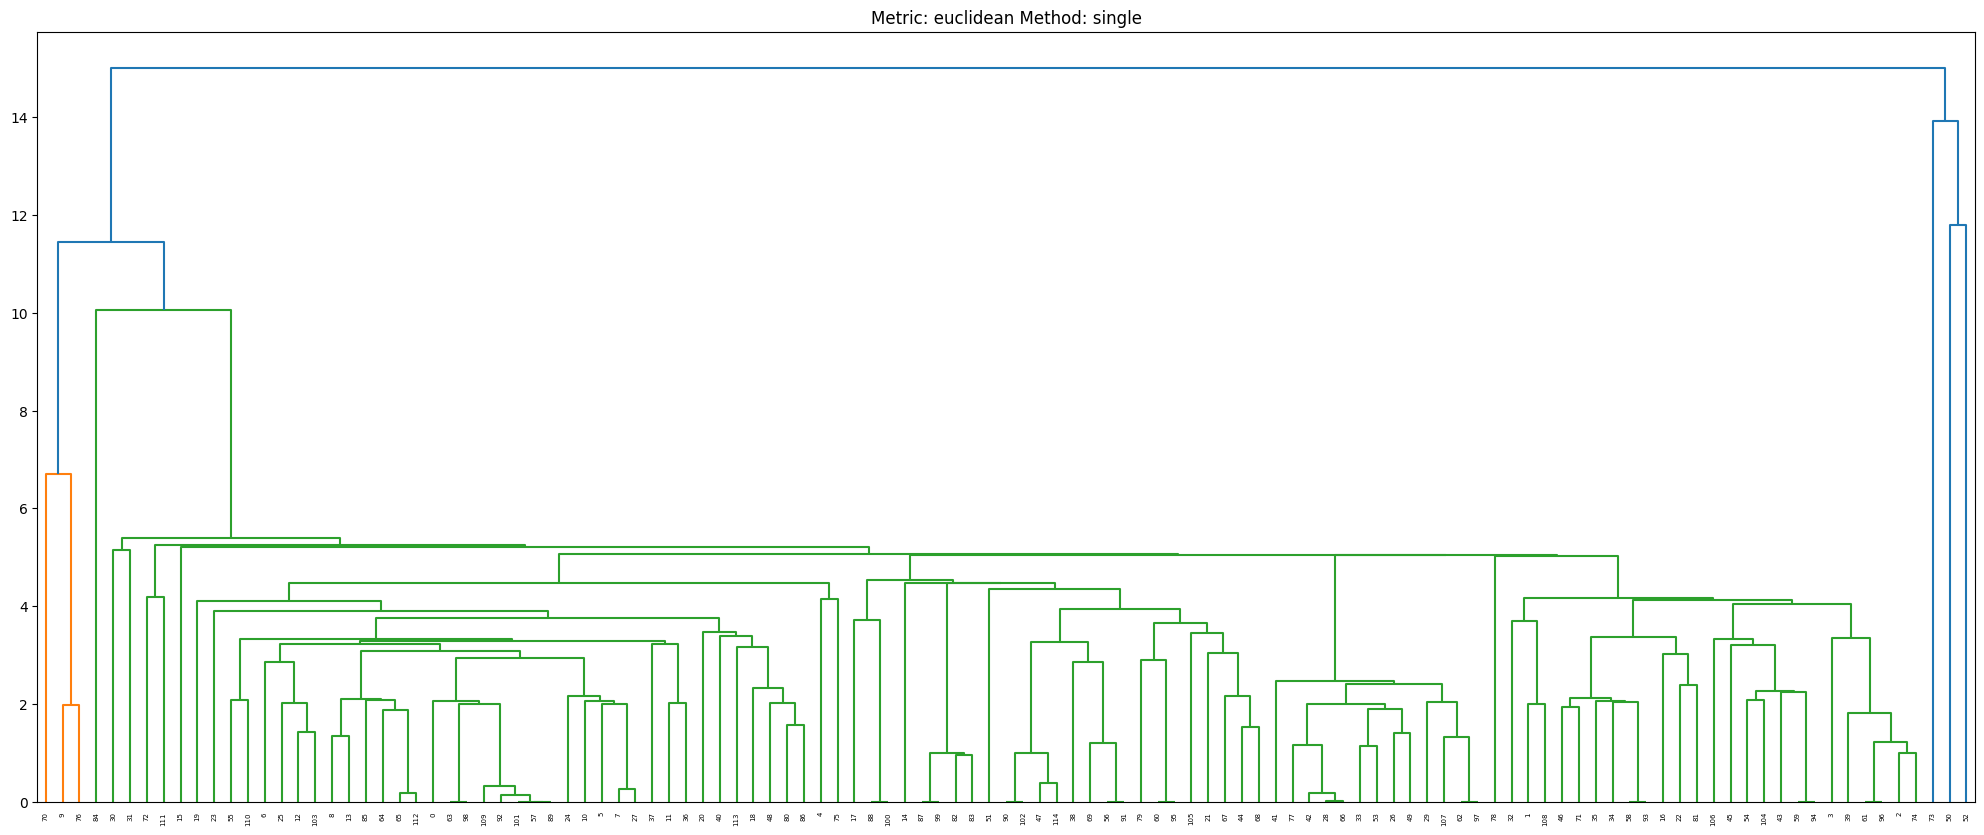

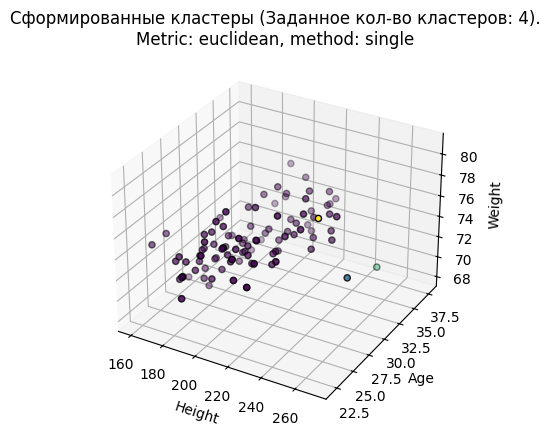

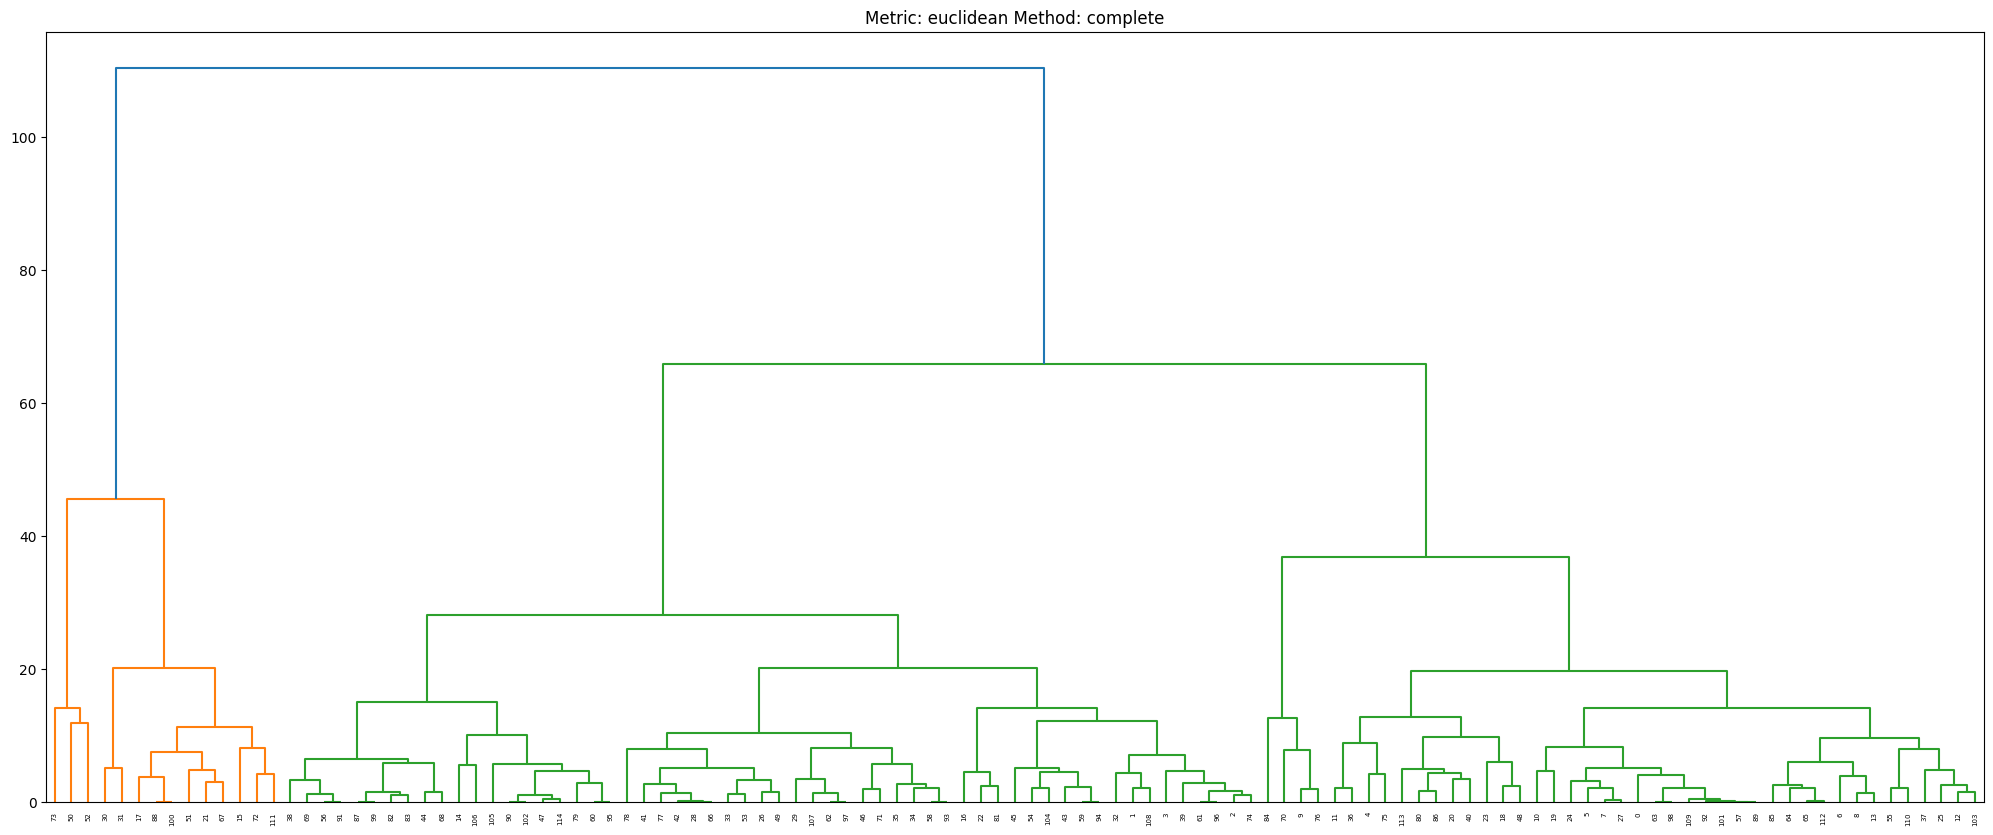

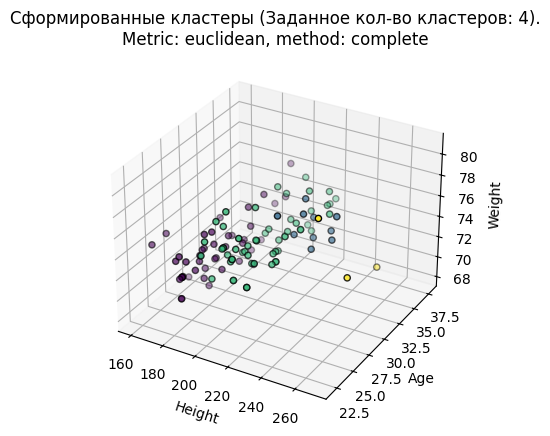

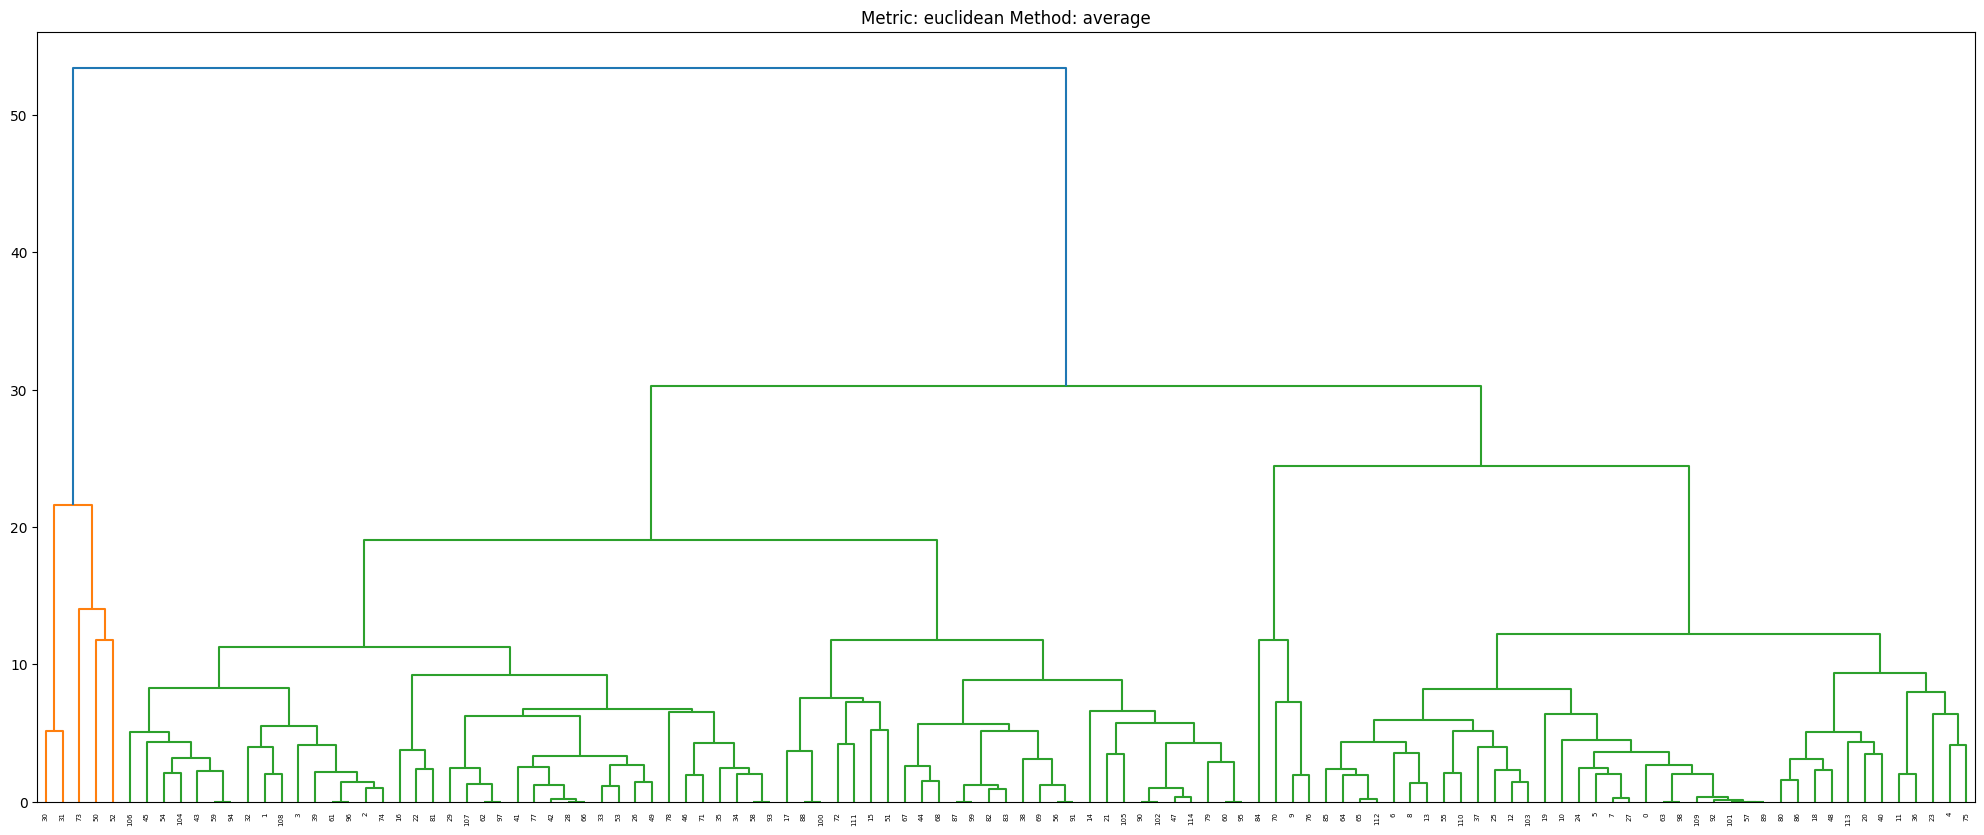

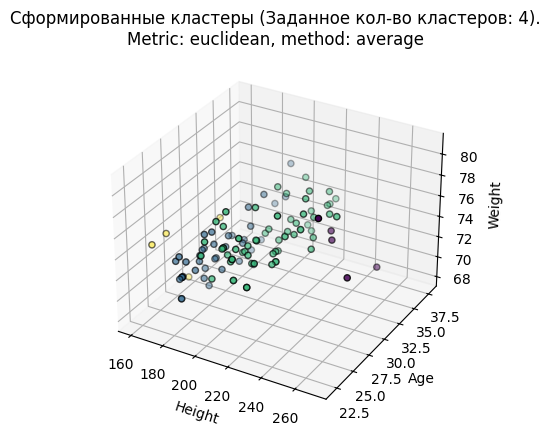

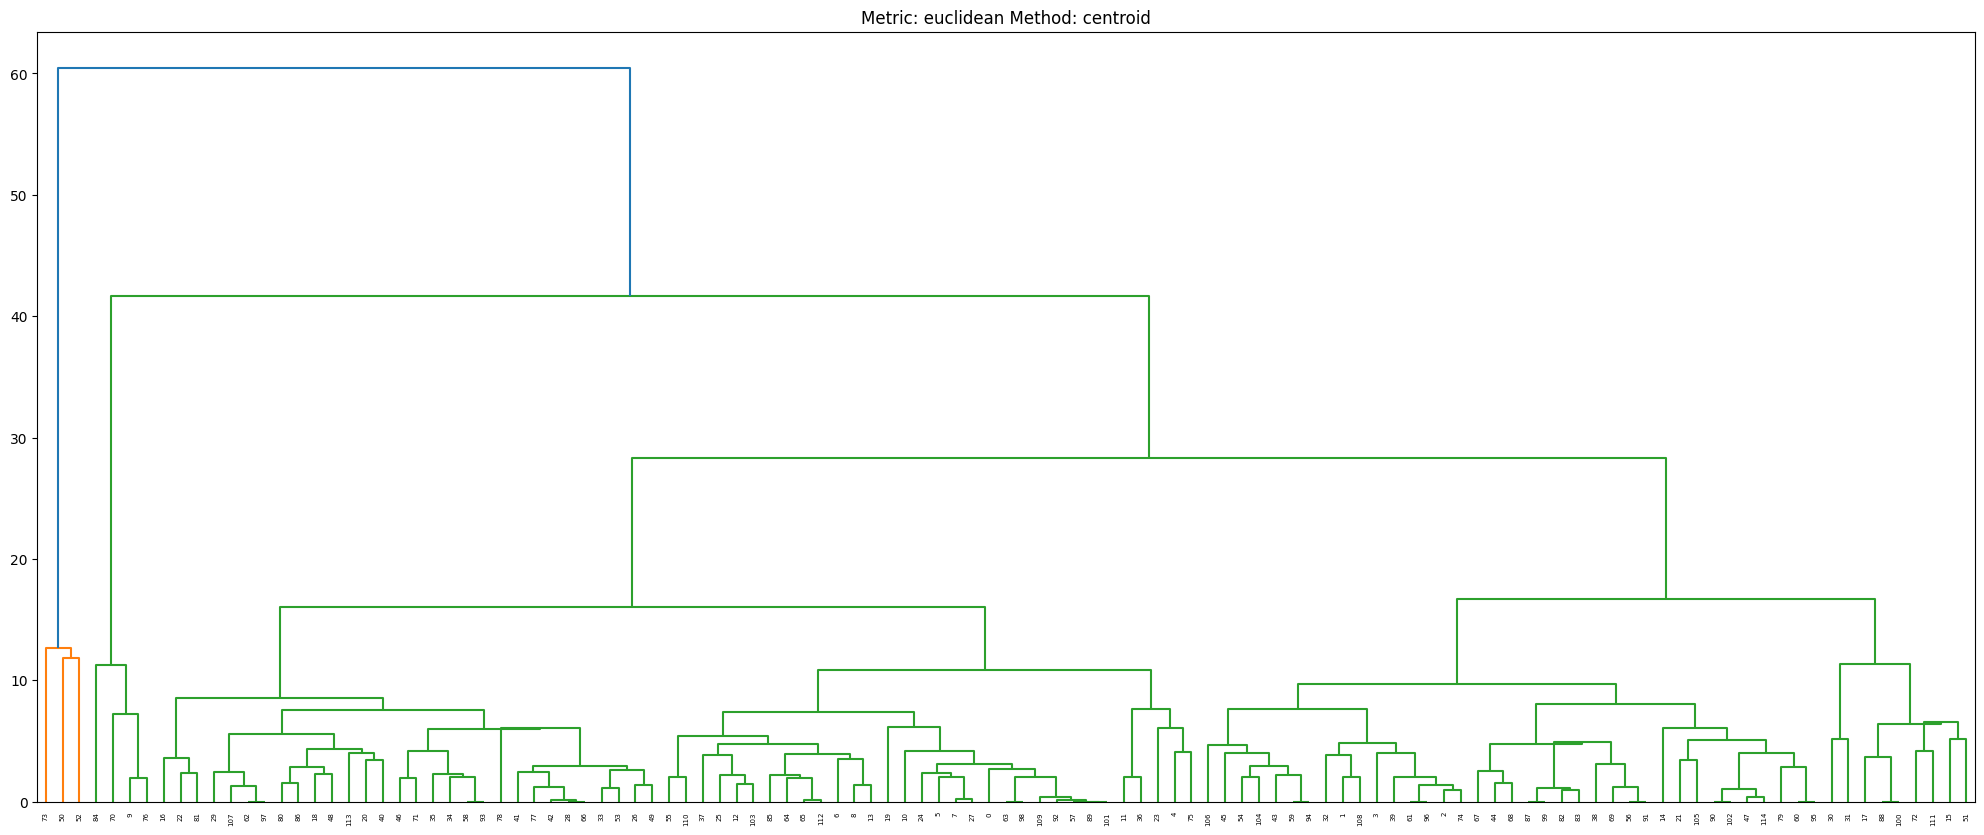

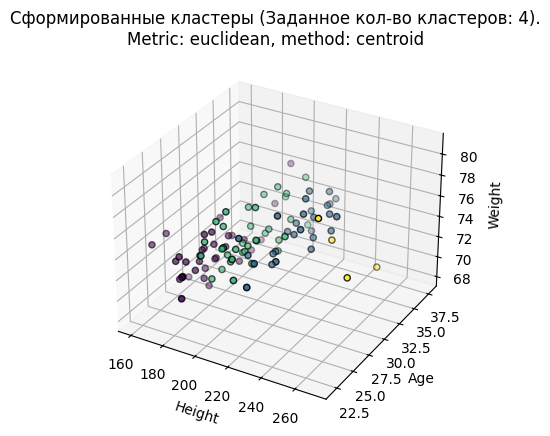

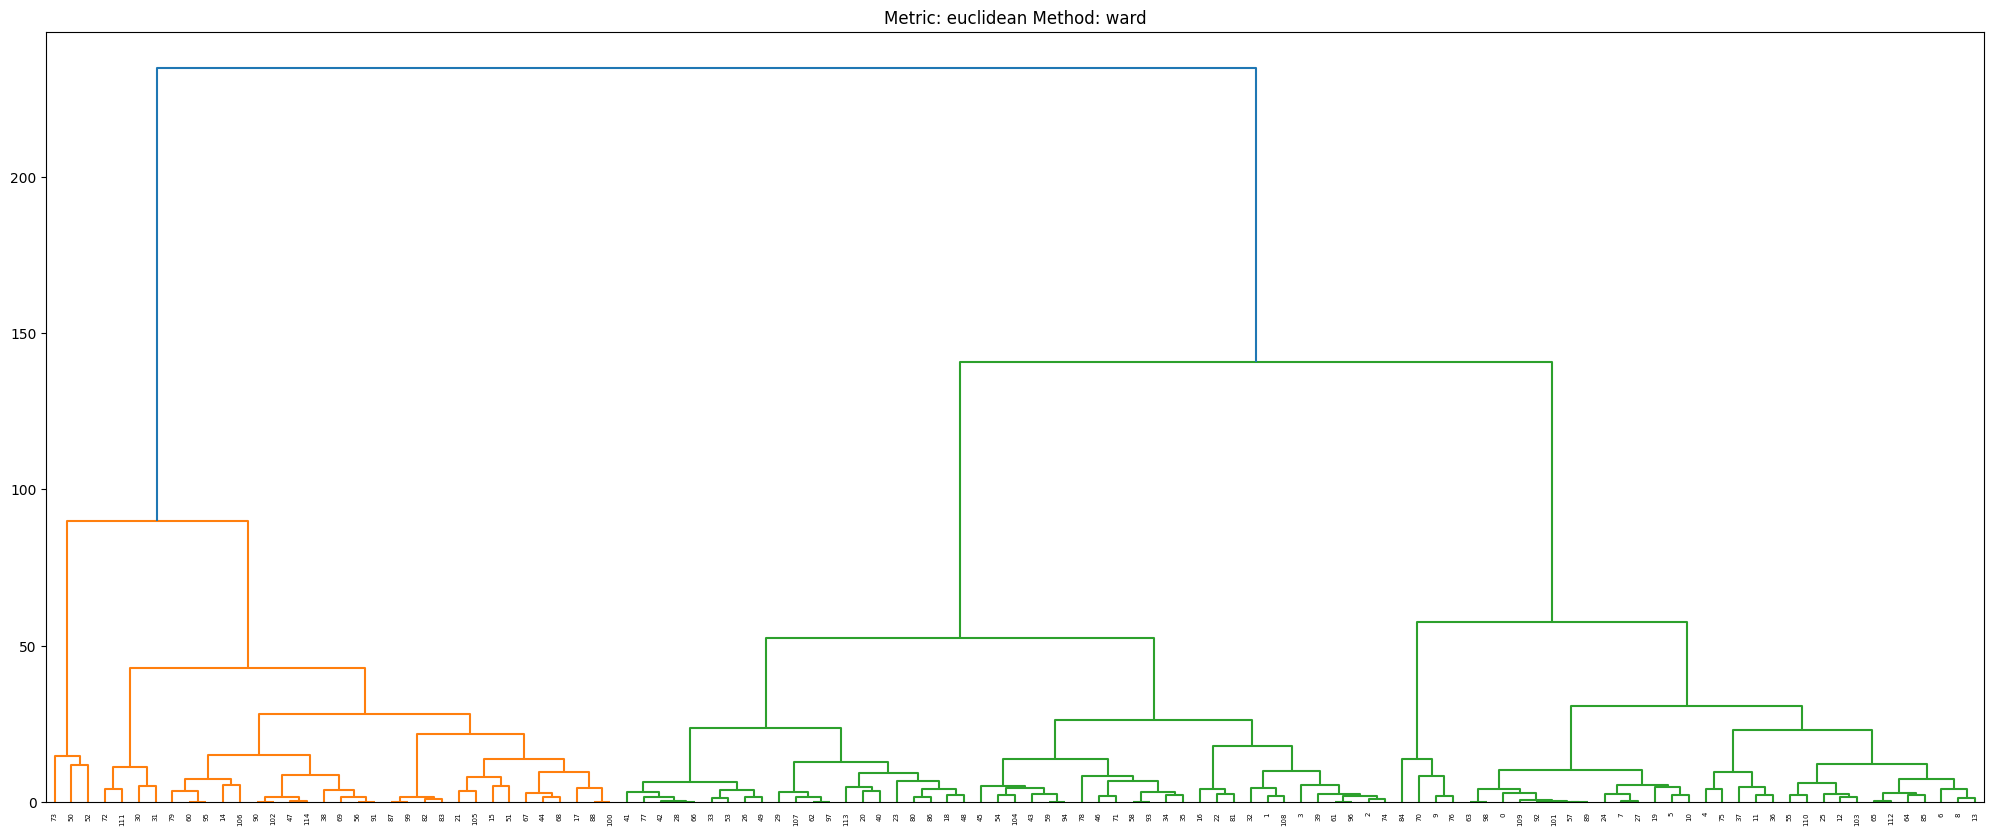

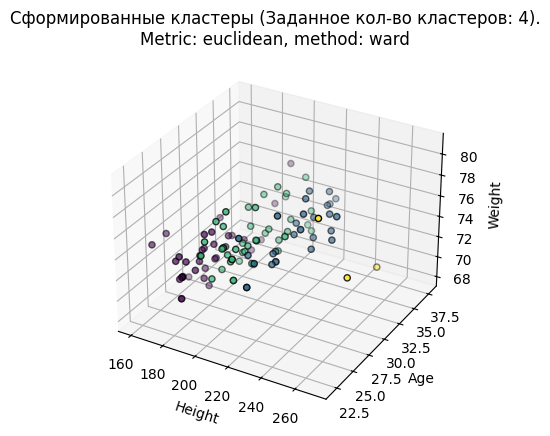

In [170]:
methods = ['single', 'complete', 'average', 'centroid', 'ward']

for method in methods:
    plot_dendrogramm(data_x, method, 'euclidean')
    plot_clusters(data_x, 4, method, 'euclidean', tuple(data_x.columns))

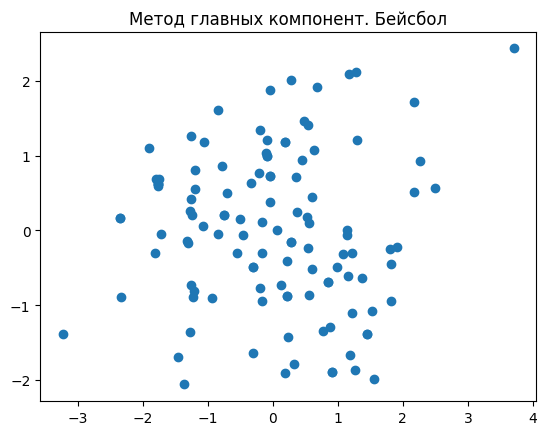

Номера компонент
         0          1          2 
Информативность компонент
     0.497      0.358      0.145 
Собственные вектора
     0.610      0.518     -0.599 
     0.729     -0.072      0.680 
     0.309     -0.852     -0.422 
Собственные числа
     1.490      1.074      0.436 
--------------------------------------------
Общее количество информации: 85.46%


In [171]:
#Метод ГК. Получение параметров
scaler = StandardScaler()
data_x_scaled = scaler.fit_transform(data_x)
pca = decomposition.PCA()
x_pca = pca.fit_transform(data_x_scaled)
eigen_vectors = pca.components_
eigen_values = get_eigen_values(data_x_scaled, eigen_vectors)
data_delta = pca.explained_variance_ratio_

#Графики
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.title('Метод главных компонент. Бейсбол')
plt.show()

#Параметры печати
round_to = 3
width = 10
#Вывод данных
print('Номера компонент')
print_list_rounded(range(data_delta.shape[0]), width, 0)
print('Информативность компонент')
print_list_rounded(data_delta, width, round_to)
print('Собственные вектора')
for ei_vector in eigen_vectors.T:
    print_list_rounded(ei_vector, width, round_to)
print('Собственные числа')
print_list_rounded(eigen_values, width, round_to)
print('-'*44)
print(f'Общее количество информации: {100*sum(data_delta[:2]):.2f}%')

         dim1      dim2
0   -3.558745  5.155345
1    4.529714 -3.999034
2    4.198637 -1.069694
3    5.767485 -3.219747
4    6.839667 -5.069390
..        ...       ...
110 -1.334990  3.612128
111  0.964366 -4.025388
112 -5.789506  3.421834
113 -5.151275  2.275617
114 -0.136803 -1.727745

[115 rows x 2 columns]


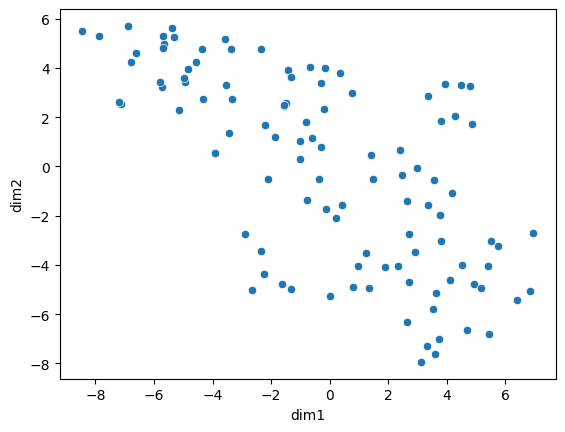

In [172]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data_x_scaled)
tsne_df = pd.DataFrame(data=tsne_data, columns=('dim1', 'dim2'))
print(tsne_df)
sns.scatterplot(data=tsne_df, x='dim1', y='dim2')
plt.show()

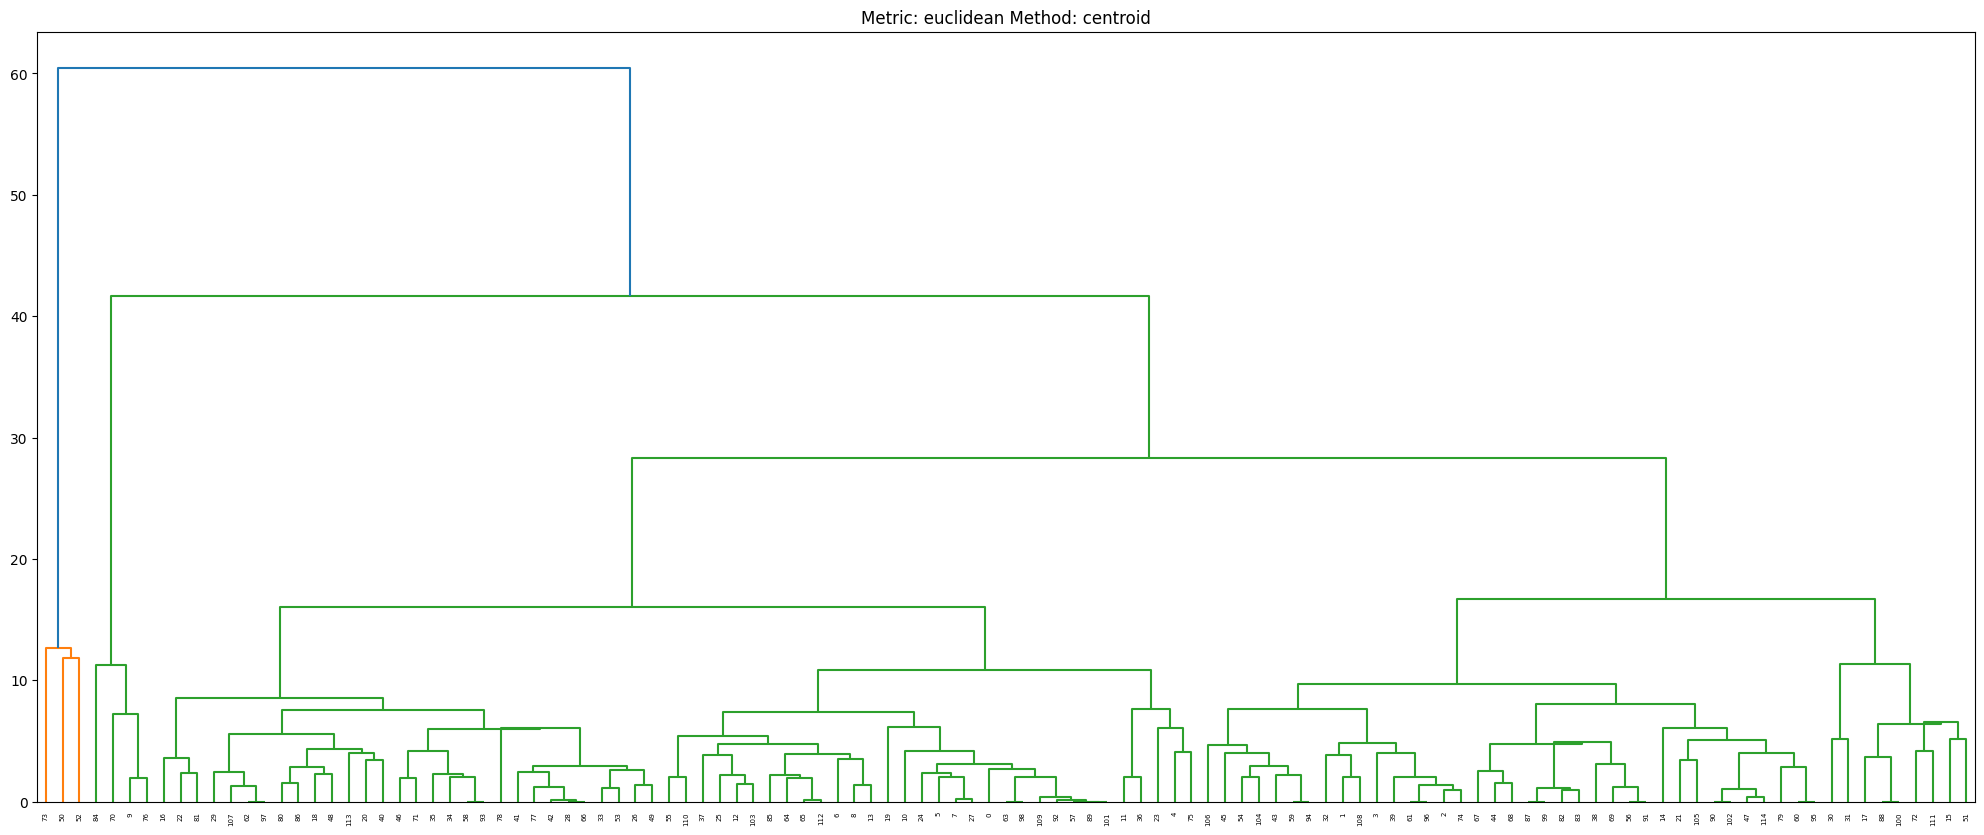

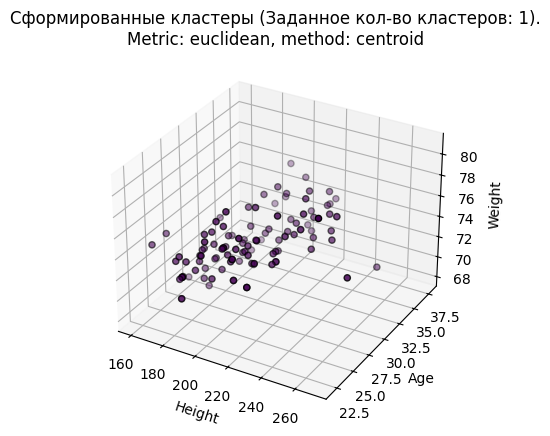

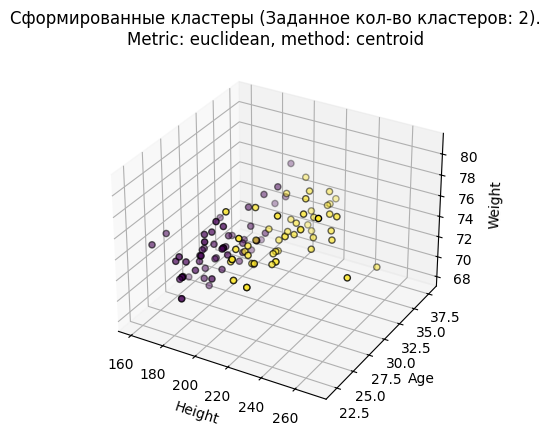

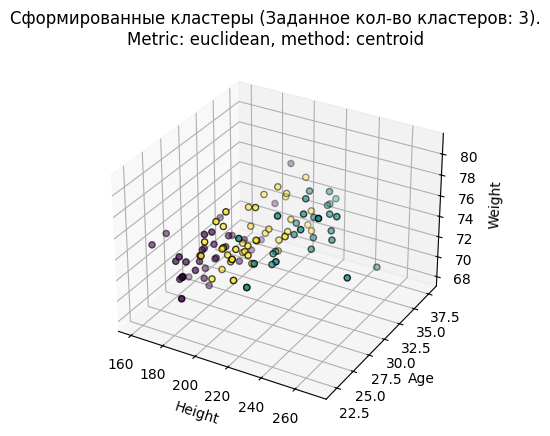

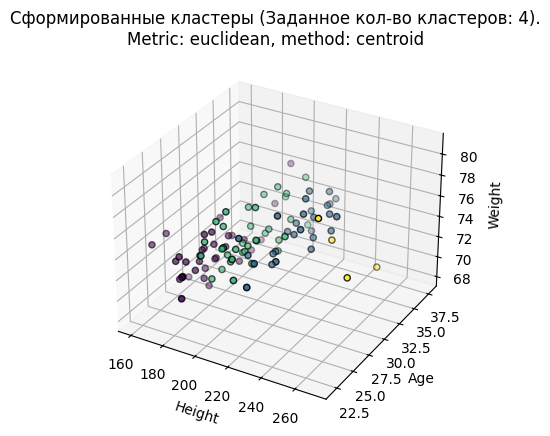

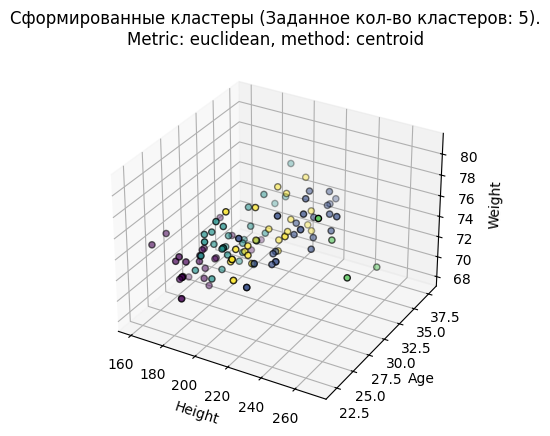

In [173]:
plot_dendrogramm(data_x, method='centroid')
for clusters in range(1, 6):
    plot_clusters(data_x, clusters, method='centroid', columns=tuple(data_x.columns))

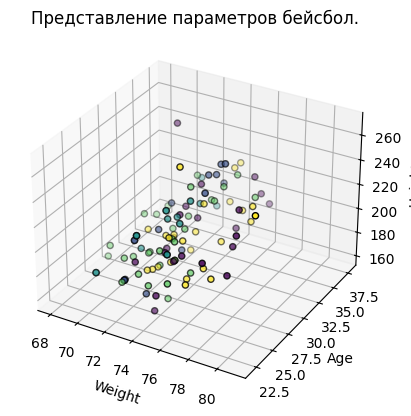

In [180]:
fig = plt.figure()
ax = plt.axes(projection='3d')
z = baseball_pd['Height']
x = baseball_pd['Weight']
y = baseball_pd['Age']
ax.scatter(x, y, z, marker='o', c=baseball_pd['Position'], edgecolors=['000']*len(x))
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Height')
ax.set_title('Представление параметров бейсбол.')

plt.show()